In [6]:
!pip install spectral-cube
!pip install pvextractor 
!pip install aplpy
import matplotlib.pyplot as plt
import numpy as np
from scipy import*
import scipy.ndimage as nd
import matplotlib 
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import MaxNLocator
from scipy import stats
import aplpy
from matplotlib import*
from astropy.convolution import Kernel1D
#from astropy.convolution import Box1DKernela
from astropy import units as u
from astropy.io import fits
from spectral_cube import SpectralCube
from spectral_cube import* # SpectralCube 
from spectral_cube import Projection 
import scipy.ndimage as nd
from pvextractor import extract_pv_slice
from pvextractor import Path
from scipy import optimize

from sympy import nsolve
from scipy.optimize import fsolve 
from scipy.constants import*
from astropy import constants as con
from astropy import units as u
#import matplotlib.mlab as mlab
from astropy.convolution import Kernel1D
from astropy.table import Table
from astropy.wcs import WCS
from astropy.wcs import utils 
from astropy.wcs.utils import pixel_to_skycoord
from astropy.wcs.utils import skycoord_to_pixel
from astropy.table import QTable
#from yt.mods import ColorTransferFunction, write_bitmap
#from astropy import yt
import warnings
from astropy.io import fits
import pandas as pd
import seaborn as sns
from astropy.table import vstack, hstack, join

from astropy import units as u
from astropy.visualization.wcsaxes import Quadrangle

# Import DataSci packages and classes >>>>>>>>>>>>>>>>>>

import pandas as pd
import numpy as np

# We'll use this later
from numpy import meshgrid

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

# This is new, it will allow us to interact with
# 3d plots in the notebook
from mpl_toolkits.mplot3d import Axes3D

## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.base import clone
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor as gbreg 

In [7]:
#############################################################################################################
## >>>>>>>>>>>>>>>>> Alternative way of uploading and reading files >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#############################################################################################################
from google.colab import drive
drive.mount('/content/gdrive')

filepath = '/content/gdrive/MyDrive/0.Work/RESEARCH_INFO/Research_2021/PilotSurvey_Newfields//Large-sample-outflows-in-CygX-and-ML-methods/'
#filepath = "C:\\Users\\Uber-PC\\Google Drive\\0.Work\\CourseworkStudyMaterial\\Data_Science\\Fall2021\\Erdos_GitHub\\fall-2021\\python prep\\Practice Problems\\" # <<<< this only works with Jupyter Notebook 
           #"C:\Users\Uber-PC\Google Drive\0.Work\CourseworkStudyMaterial\Data_Science\Fall2021\Erdos_GitHub\fall-2021\python prep\Practice Problems\random_walk.csv"

##########################################################################################################################

#kryu_list = QTable.read(filepath + '/data/asu (1).fit') # original Kryukova survey 
#proto = QTable.read(filepath + '/data/cygx_pilot_protostars(Kry).fit')
#wu = QTable.read(filepath + '/data/WuTable.fit')
#outflowsCloud = QTable.read(filepath + '/data/outflowsClouds_output.fit')
#cygX_init_newfields = QTable.read(filepath+'/data/table_newfields_input.fit')
#cygX_init_pilot_1_5kpcA =  QTable.read(filepath + '/data/cygX_pilot_1.5kpc_A_input.fit')
#pilotL = QTable.read(filepath + '/data/cygxPilot_proto.fits')
#cygx_combined_out = pd.read_csv(filepath + '/data/cygx_combined_out.csv').round({'RAJ2000':3, 'DecJ2000':3})

outflows = QTable.read(filepath + '/data/outflowsCloudsJCMT_output.fit')
outflowsF = QTable.read(filepath + '/data/outflowsCloudsJCMT_F.fit')
#proto_0 = QTable.read(filepath + '/data/cygx_class0.fits')
#proto_1 = QTable.read(filepath + '/data/cygx_class1.fits')

# read coordinates tables 
#of_newfields = QTable.read(filepath + '/data/table_newfields_input.fit')
#of_cygrift = QTable.read(filepath + '/data/cygX_pilot_cygrift0.65kpc_outout.fit')
#of_W75 = QTable.read(filepath + '/data/cygX_pilot_W75_outout.fit')
#of_DR21 = QTable.read(filepath + '/data/cygX_pilot_DR21_outout.fit')

#cygX0 = SpectralCube.read(filepath + '/data/cygx_cobig_small.fits')
#cygX_pilot = SpectralCube.read(filepath +'/data/cygX_pilot_km.fits')
#cygx21cm = SpectralCube.read(filepath + '/data/cygx.c21_reprj.fits')
co =  SpectralCube.read(filepath + '/data/co_spec_cropped.fits') #cube_cobig_km
#co_mom0 = (np.expand_dims(co.moment(order=0, axis=0), axis=0))
#cygx_mom0 = SpectralCube.read(filepath + '/data/cygx_mom0.fits')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [10]:
co_mom0 = (np.expand_dims(co.moment(order=0, axis=0), axis=0))

In [ ]:
%time
outflowsFr = outflowsF.to_pandas().round({'RAJ2000':3, 'DecJ2000':3,	'Vc':2,	'Distance':2,	'Mass':3,	'Momentum':3,	'Energy':3,	'Dynamical Time':3,	'Cloud_Mass':3,	'Cloud_Energy':3,	'Energy_(of/cloud+of)':3,	'L_mech':3,	'Cloud_grav_energy':3,	'Cloud_time_ff':3,	'Cloud_collapse_power':3,	'log_power_ratio':3,	'log_tDyn_tFF_ratio':3})
outflowsFr

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 6.91 µs


,Seq,ID,RAJ2000,DecJ2000,Vc,Distance,Mass,Momentum,Energy,Dynamical Time,Cloud_Mass,Cloud_Energy,Energy_(of/cloud+of),L_mech,Cloud_grav_energy,Cloud_time_ff,Cloud_collapse_power,log_power_ratio,log_tDyn_tFF_ratio
0,1,b'G79.886+2.552',306.127,42.072,6.60,0.65,0.381,1.984,1.510,8.988,9.153,5.683,0.210,0.014,0.099,1.578,0.000,2.430,-1.244
1,4,b'G79.962+2.556',306.196,42.137,5.50,0.65,0.011,0.102,0.097,2.509,3.616,1.515,0.060,0.003,0.015,2.510,0.000,2.800,-2.000
2,3,b'G80.149+2.710',306.154,42.376,6.00,0.65,0.191,0.634,0.229,5.672,43.681,3.538,0.061,0.003,2.244,0.722,0.003,0.113,-1.105
3,2,b'G80.158+2.727',306.144,42.394,6.00,0.65,0.229,0.899,0.509,5.063,27.060,4.307,0.106,0.008,0.861,0.918,0.001,1.030,-1.258
4,27,b'G80.815+0.661',308.918,41.709,-3.00,1.50,0.149,0.388,0.138,30.027,6.348,0.991,0.122,0.000,0.047,1.894,0.000,1.264,-0.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,33,b'0',309.856,41.328,-1.38,1.50,11.935,27.879,6.831,19.776,1091.152,108.336,0.059,0.029,1400.140,0.144,8.021,-2.448,0.136
80,34,b'0',309.873,41.368,-1.12,1.50,0.980,2.654,1.037,21.621,468.391,42.646,0.024,0.004,257.999,0.221,0.968,-2.387,-0.009
81,36,b'0',309.880,41.364,-2.50,1.50,5.501,10.693,2.514,31.464,631.369,63.063,0.038,0.007,468.778,0.190,2.043,-2.490,0.219
82,32,b'0',309.882,41.337,-2.25,1.50,2.000,7.427,2.841,5.244,947.514,110.024,0.025,0.045,1055.777,0.155,5.636,-2.099,-0.471


In [ ]:
outflowsF

NameError: ignored

In [ ]:
proto
flat_spectrum_max = 0.3
flat_spectrum_min = -0.3

In [ ]:
kryu_list_df = kryu_list.to_pandas()
kry_list_df_flat = kryu_list_df[(kryu_list_df.alpha < 0.3) & (kryu_list_df.alpha >= -0.3)].reset_index()

In [ ]:
%time
kry_list_df_flat

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs


NameError: ignored

In [ ]:
cygx_combined_out = pd.read_csv(filepath + '/data/cygx_combined_out.csv').round({'RAJ2000':3, 'DecJ2000':3})
cygx_combined_out

NameError: ignored

INFO: Setting slices=[0] [aplpy.core]
INFO: Auto-setting vmin to -1.833e+01 [aplpy.core]
INFO: Auto-setting vmax to  8.357e+01 [aplpy.core]
INFO: Setting slices=[0] [aplpy.core]
INFO: Auto-setting vmin to  2.651e+00 [aplpy.core]
INFO: Auto-setting vmax to  6.160e+01 [aplpy.core]
k-value= 0 

nan pixel
k-value= 1 

non nan pixel


<string>:6: RuntimeWarning: Mean of empty slice


k-value= 2 

non nan pixel
k-value= 3 

non nan pixel
k-value= 4 

non nan pixel
k-value= 5 

non nan pixel


<string>:6: RuntimeWarning: Mean of empty slice


k-value= 6 

non nan pixel


<string>:6: RuntimeWarning: Mean of empty slice


k-value= 7 

nan pixel
k-value= 8 

non nan pixel
k-value= 9 

non nan pixel
k-value= 10 

non nan pixel
k-value= 11 

non nan pixel
k-value= 12 

non nan pixel


<string>:6: RuntimeWarning: Mean of empty slice


k-value= 13 

non nan pixel


<string>:6: RuntimeWarning: Mean of empty slice


k-value= 14 

nan pixel
k-value= 15 

non nan pixel
k-value= 16 

non nan pixel
k-value= 17 

non nan pixel
k-value= 18 

non nan pixel
k-value= 19 

non nan pixel
k-value= 20 

non nan pixel
k-value= 21 

nan pixel
k-value= 22 

non nan pixel
k-value= 23 

non nan pixel
k-value= 24 

non nan pixel
k-value= 25 

non nan pixel
k-value= 26 

non nan pixel
k-value= 27 

non nan pixel
k-value= 28 

nan pixel
k-value= 29 

non nan pixel
k-value= 30 

non nan pixel
k-value= 31 

non nan pixel
k-value= 32 

non nan pixel
k-value= 33 

non nan pixel
k-value= 34 

non nan pixel
k-value= 35 

nan pixel
k-value= 36 

non nan pixel
k-value= 37 

non nan pixel
k-value= 38 

non nan pixel
k-value= 39 

non nan pixel
k-value= 40 

non nan pixel


<string>:6: RuntimeWarning: Mean of empty slice


k-value= 41 

non nan pixel


<string>:6: RuntimeWarning: Mean of empty slice


k-value= 42 

nan pixel
k-value= 43 

non nan pixel
k-value= 44 

non nan pixel
k-value= 45 

non nan pixel
k-value= 46 

non nan pixel
k-value= 47 

non nan pixel


<string>:6: RuntimeWarning: Mean of empty slice


k-value= 48 

non nan pixel


<string>:6: RuntimeWarning: Mean of empty slice


INFO: Auto-setting resolution to 245.53 dpi [aplpy.core]
INFO: Auto-setting resolution to 97.1026 dpi [aplpy.core]
0
co mean values: [        nan         nan  1.25773716  6.87276793  0.61674994         nan
         nan         nan  1.8567822   3.5519011   1.99477518  1.03546023
         nan         nan         nan  3.22558141  1.28278172  1.12447071
  0.41341394  0.65832579  0.20712158         nan  6.13979435  1.99986529
  0.52302212  2.73794746  1.4275856   1.65219831         nan  1.4632504
  5.88256645  9.21749115  5.50690699  2.58312559  0.66684657         nan
  3.95316958  8.8983593  17.98693275  2.55068898         nan         nan
         nan  1.2453469   1.43647063  7.58489227  4.22470856         nan
         nan] K km / s
21-cm mean values: [18.29869461 23.0622654  14.92785168 12.60480118 10.2796917   9.58103848
 10.98877811 22.61241913 29.54439735 19.64862633 15.06107044 12.33699703
  9.85798359  8.81494808 24.16682816 23.00341415 15.65573692 13.18206596
 12.46931267 11.3182582

,12CO(K km/s),21cm(K),proto_flat_number
38,17.986933,25.364428,57.0
22,6.139794,17.214018,39.0
14,NaN,24.166828,33.0
30,5.882566,21.594070,25.0
31,9.217491,21.756325,24.0
23,1.999865,18.295208,23.0
37,8.898359,18.824352,22.0
16,1.282782,15.655737,22.0
28,NaN,17.082020,21.0
21,NaN,19.031555,20.0


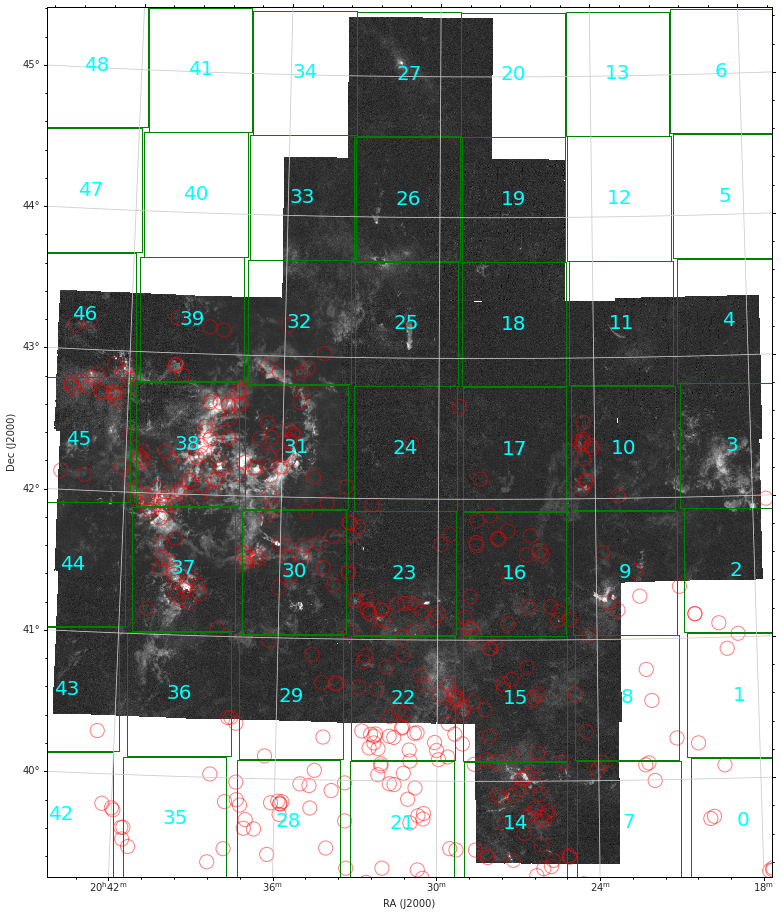

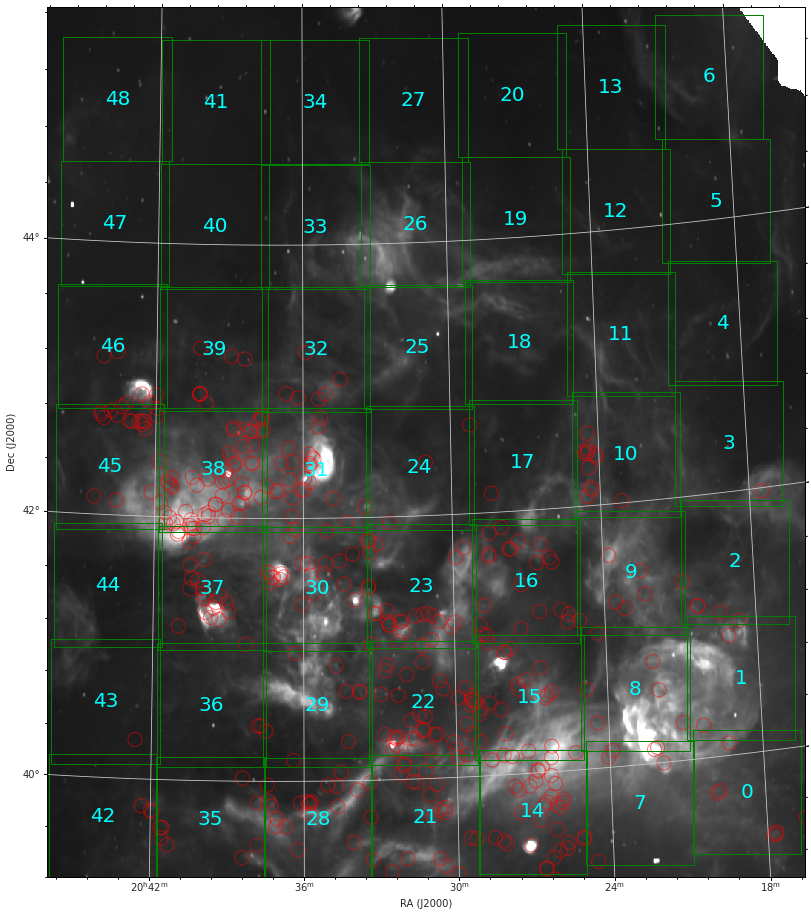

In [ ]:
####################################################################################################################################################################################################################################################
###  >>>>> ML REGRESSION MODEL OF protostar number DENSITY ON MEAN CO and 21cm 
# >>> INTENSITY AND MEAN 21-CM RADIO CONTINUUM INTENSITY PER UNIT AREA GRID <<<<<<
# >>>>>>>>>>>>>>>> TEST CODES <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< 
from astropy.nddata import Cutout2D
from numpy import meshgrid
## For plotting
import matplotlib.pyplot as plt
import seaborn as sns
# This is new, it will allow us to interact with 3d plots in the notebook
from mpl_toolkits.mplot3d import Axes3D
## This sets the plot style to have a grid on a white background
sns.set_style("whitegrid")
from pandas.plotting import scatter_matrix

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
warnings.filterwarnings('ignore', category=UserWarning, append=True)

proto_flat = kry_list_df_flat.round({'RAJ2000':3, 'DecJ2000':3})
N = 7
xmin = co.world_extrema[0][0] # 304.157172*u.deg
xmax = co.world_extrema[0][1] #311.481944*u.deg
ymin = co.world_extrema[1][0] #39.256583*u.deg 
ymax = co.world_extrema[1][1] #45.458596*u.deg
dx = np.abs(xmax - xmin) / N
dy = np.abs(ymax - ymin) / N

co_mean = np.zeros(N**2) *u.K * u.km / u.s
c21_mean = np.zeros(N**2) * u.K
n_flat = np.zeros(N**2)

counter = 0
k = 0
w0 = co.shape[2]/N # this is because cubes have vel, y/Dec, x/RA data in this order
h0 = co.shape[1]/N

w0_21cm = cygx21cm.shape[2]/N # this is because cubes have vel, y/Dec, x/RA data in this order
h0_21cm = cygx21cm.shape[1]/N

#co_mom0 = (np.expand_dims(co.moment(order=0, axis=0), axis=0))

f = aplpy.FITSFigure(co_mom0.hdu,figsize=(18, 16))
f.show_grayscale()

g = aplpy.FITSFigure(cygx21cm.hdu,figsize=(18, 16))
g.show_grayscale()

# >>>>>> this part for displaying proto_flat and sf regions >>>>>>>>>>>>>>>>>>
cdelt = utils.proj_plane_pixel_scales(co.wcs)
dv = cdelt[2]*1e-6*u.km/u.s
vlo1 = - 8.0*u.km/u.s # low negative velocity range: -8 =< v < 0
vhi1 = 1*u.km/u.s
# high positive velocity range: v > 8
vlo3 = 7*u.km/u.s + dv
vhi3 = 30*u.km/u.s
# >>>>>>>>>>>>>>>> plot proto_flat >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
for z in range(0,len(proto_flat)):
        f.show_markers(proto_flat.loc[z]['RAJ2000'], proto_flat.loc[z]['DEJ2000'], 
                       edgecolor='red', facecolor='none',marker='o', s=200, alpha=0.5)
        g.show_markers(proto_flat.loc[z]['RAJ2000'], proto_flat.loc[z]['DEJ2000'], 
                       edgecolor='red', facecolor='none',marker='o', s=200, alpha=0.5)
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

for i in range(N):
    
    for j in range(N):
        
        # TASK1: this extracts pixels based on 12co cube coordinates and slices segments from 12co map 

        lon_range = [xmin+i*dx, xmin+(i+1)*dx]
        lat_range = [ymin+j*dy, ymin+(j+1)*dy]
        #print(lon_range[0], lon_range[1], lat_range[0], lat_range[1])
        
        xw = (lon_range[0]+lon_range[1])/2
        yw = (lat_range[0]+lat_range[1])/2
        
        x0, y0, _ = co.wcs.wcs_world2pix(xw, yw, 0, 0)
        f.show_rectangles(x0, y0, w0, h0, angle=0, layer=False, zorder=None,
                          coords_frame='pixel', edgecolor='green')
        f.add_label(xw.value, yw.value, str(k), color='cyan', size=20)
        x0_21cm, y0_21cm, _ = cygx21cm.wcs.wcs_world2pix(xw, yw, 0, 0)
        g.show_rectangles(x0_21cm, y0_21cm, w0_21cm, h0_21cm, angle=0, layer=False, zorder=None,
                          coords_frame='pixel', edgecolor='green')
        g.add_label(xw.value, yw.value, str(k), color='cyan', size=20)
        # Create a sub_cube cutout with these coordinates
        position = (x0, y0)
        size = (w0, h0)     # pixels

        if i < N-1:
          lon_range = [xmin+i*dx, xmin+(i+1)*dx]
        elif i==N-1:
          lon_range = [xmin+i*1.005*dx, xmin+(i+1)*0.95*dx]

        print('k-value=',k,'\n')

        try:
            sub_cube_co = co.subcube(xlo=lon_range[0], xhi=lon_range[1], ylo=lat_range[0], yhi=lat_range[1])
            subcube_mom = (np.expand_dims(sub_cube_co.moment(order=0, axis=0), axis=0)) * u.K
            #subcube_mom =(sub_cube_co.sum(axis=0)*dv)*u.K#.moment(order=0, axis=0) # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< HERE HERE HERE <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< ||||||||||||||||||||||   IndexError happening here but WHY ????????????????
            #print('non nan pixel')
            #print(subcube_mom) # <<<<<<<< should not be all NaN for k=22
            co_mean[k] = np.nanmean(subcube_mom[~np.isnan(subcube_mom)])
        except IndexError:
             #print('nan pixel')
          
             co_mean[k] = np.nan
                
        # TASK2: this extracts pixels based on 21cm coordinates and slices segments from 21cm map  
        sub_cube_c21 = cygx21cm.subcube(xlo=lon_range[0], xhi=lon_range[1], ylo=lat_range[0], yhi=lat_range[1])
        c21_mean[k] = (sub_cube_c21.mean(axis=(1,2)))[0] * u.K 


        # TASK3: count proto_flat in these 25 coordinate segments >>> use a boolean statement if coordinates from output_jcmt list belongs to each segment, counter[k]=counter[k]+1 >> NOTE: does not count for OFs at .65 kpc
        for z in range(0,len(proto_flat)):
            s1 = (proto_flat.loc[z]['RAJ2000']*u.deg > xmin+(i*dx)) & (proto_flat.loc[z]['RAJ2000']*u.deg < xmin+((i+1)*dx))
            s2 = (proto_flat.loc[z]['DEJ2000']*u.deg > ymin+(j*dy)) & (proto_flat.loc[z]['DEJ2000']*u.deg < ymin+((j+1)*dy))
            #s3 = (outflows.loc[z]['Distance'] != 0.65)
            if (s1 and s2) == True: # and s3
            # selected outflow coordinates fall in the range of fieldN.fits under consideration
                n_flat[k] +=1
            else:
                pass
            

        k +=1
        #if k==23:
          #break


f.save('co_grids.pdf')
g.save('21cm_grids.pdf')    
print(counter)
print('co mean values:',co_mean)
print('21-cm mean values:',c21_mean)
print('outflow numbers in segments:', n_flat, '\n Total number of proto_flat=', n_flat.sum())

proto_co = pd.DataFrame({'12CO(K km/s)':co_mean, '21cm(K)': c21_mean, 'proto_flat_number':n_flat})
proto_co.to_csv(filepath + '/data/co+21cm_flat49.csv')
proto_co.sort_values('proto_flat_number', ascending=False)

In [ ]:
#############################################################################################################################################################
################################################                                          ###################################################################
################################################  POWER IN CLOUD TURBULENCE ENERGY        ###################################################################
################################################  small scale clumps around outflows      ###################################################################
################################################                                          ###################################################################
#############################################################################################################################################################
# CODE DEVELOPMENT: CLOUD MASS CALCULATION 
# 1. create a subcube around the center RA, Dec of a outflow with a fixed size spatial pixels and 
# [min blue velocity, max red velocity]
# 2. produce a contour showing the outflow and a circle showing the cloud of size ~ 5*beamsize ~ 75"
# 3. calculate energy of a smaller subcube representing the cloud and vaxis range in mu +/- 2*sigma.
# Mu and sigma are estimated as before, using line center and miinized energy 
from astropy.wcs import utils
from astropy import units as u
import warnings
import warnings
warnings.filterwarnings("ignore")
from matplotlib.patches import Circle
import sys 
import os
sys.path.append(filepath + '/data')
from cygFn import f, length, Jnu, G, Quad
################################################################################################################    

# Read data

#cube = SpectralCube.read('field13.fits') # <<<<<<---------- Change filename ******
#cygX0 = SpectralCube.read('cygx_cobig_small.fits')
cube = cygX0.with_spectral_unit(u.km/u.s)

cygX_init = outflowsF # QTable.read('table_newfields_input.fit') ### CHANGE FIELD NAME ###
#cygX_init = QTable.read('nf_input_test.fit') 

warnings.filterwarnings('ignore', category=UserWarning, append=True)


## CREATE EMPTY TABLE FOR OUTPUT MASS, MOMENTUM, ENERGY 
t = QTable(names=('Seq','ID','RAJ2000','DecJ2000','Outflow_Lum_mech','Cloud_Mass','Cloud_En_turb','Cloud_Lum_turb'),
           dtype=('i8','U10','f8','f8','f8','f8','f8','f8'))  
for z in range(0, len(cygX_init)):
    s1 = (cygX_init['RAJ2000'][z] > (cube.world_extrema[0])[0]) & (cygX_init['RAJ2000'][z] < (cube.world_extrema[0])[1])
    s2 = (cygX_init['DecJ2000'][z] > (cube.world_extrema[1])[0]) & (cygX_init['DecJ2000'][z] < (cube.world_extrema[1])[1])
    # imposing this condition to make sure the codes do not attmpt to compute values 
    #for coordinats ouside of sub field range
    if (s1 and s2) == True: # selected outflow coordinates fall in the range of fieldN.fits under consideration 
        print("coordinates in range for outflow no.",z) #perform the task 
    

        #RA = (ra_b.value+ra_r.value)/2
        #Dec = (dec_b.value+dec_r.value)/2
        RA = cygX_init[z]['RAJ2000'].value 
        Dec = cygX_init[z]['DecJ2000'].value
    
        distance = (cygX_init[z]['Distance']).to(u.pc).value

        ##### Spectral boundary includes 15 km/s on each side of the vel range 
        dv = (cube.spectral_axis[1]-cube.spectral_axis[0]).value
        vlo =-25*u.km/u.s
        vhi = 25*u.km/u.s

        box = 15

        x0, y0, _ = cube.wcs.wcs_world2pix(RA, Dec, 0, 0)
        print('checkpoint0',z+1)
        #print(x0)
        #print(y0)
        slab = cube.spectral_slab(vlo, vhi) 
        subcube = slab[:, int(y0-box):int(y0+box), int(x0-box):int(x0+box)]
         
        #############################################################################################
        #########################    Cloud energy calc.    ##########################################
        #############################################################################################
        
        # create a new subcube for Cloud of the size of the circle and vbmin, vrmax
        
        # pixel size in deg 
        
        ang_width = 1 * 14.6 * u.arcsec
        cdelt = utils.proj_plane_pixel_scales(cube.wcs)
        width = (ang_width*0.5 / (cdelt[0] * u.deg)).to(u.dimensionless_unscaled).value
        
        # 4 beamsize in pix 
        boxC = ((8 * cdelt[0]*u.deg)/(cdelt[0]*u.deg)).to(u.dimensionless_unscaled).value
        slabC = cube.spectral_slab(vlo, vhi) 
        cloud = slabC[:, int(y0-boxC):int(y0+boxC), int(x0-boxC):int(x0+boxC)]

        cloudshape = cloud[0].shape

        vaxis=cloud.spectral_axis.value
        
        v0array = np.zeros(cloudshape)
        sig0array = np.zeros(cloudshape)
        amparray= np.zeros(cloudshape)

        # Now calculate the opacitypoptblue, pcov = optimize.curve_fit(Quad, vaxis[EndFitBlue:StartFitBlue],(blue12 / blue13)[EndFitBlue:StartFitBlue],p0 = (c0, v0, c2),maxfev = 1000000)
        Tpeak = cloud.max(axis=0) * u.K   # <<<<--- change to u.K for big cube --->>>>
        nu = 330.588 * u.GHz
        Tbg = 2.73 * u.K
        Aul = 6.038e-7 / u.s
        B0 = 54891.42 * u.MHz
        E3 = 30 * u.K
        Tex = ((con.h * nu / con.k_B)
                / np.log(1 + con.h * nu
                        / (con.k_B * (Tpeak + Jnu(Tbg, nu=nu)))))
        Tex = Tex.to(u.K)

        co13cloud = np.zeros_like(cloud)

        DeltaNu = np.abs((vaxis[1] - vaxis[0]) * u.km / u.s/ con.c * nu).to(u.Hz)
        DeltaV = np.abs((vaxis[1] - vaxis[0]) * u.km/u.s)

        log_co13cloud = 2.074571 * np.log10(cloud) - 2.699635
        co13cloud=10**log_co13cloud

        tau13dnu = co13cloud * DeltaV 

        N13co = (8 * np.pi * nu**3 / con.c**3 / Aul
                    /(np.exp(con.h * nu / con.k_B / Tex) - 1) * tau13dnu
                    )
        Qrot = con.k_B * Tex / (con.h * B0) * np.exp(con.h * B0
                                                             / (3 * con.k_B * Tex))
        # Calculate column density of material
        N13coTot = Qrot / 7 * np.exp(E3 / Tex) * N13co # g_u=7 for u=3, l=2 transition Qrot
        # Assume a column density ratio
        NH2 = (7.5e5 * N13coTot).to(u.cm**(-2))

        apix = np.prod(
            np.abs(np.array([width, 1]) 
                    * (subcube.wcs.celestial.wcs.get_cdelt())
                / 180 * np.pi * distance)) * u.pc**2
        Mass = (NH2 * con.m_n * 2.32 * apix).to(u.solMass)
        print('Mass dimensions:',Mass.shape)

      
        # 2. estimate sigma12 and vcenter --------------->>>>>>>>>>>>>>>>>>  
   
        #### sigma calculation 
        cloudshape = cloud[0].shape # spatial shape
        Tpeak=np.ones(cloudshape)
        vpeak=np.ones(cloudshape)
        sigma=np.ones(cloudshape)
        vaxis=cloud.spectral_axis.value
        for i in range(cloudshape[0]):
            for j in range(cloudshape[1]):
                spec=cloud[:,i,j].value # removes unit=K
                Tpeak[i,j]=np.nanmax(spec)
                #print('Tpeak=',Tpeak[i,j])
                #print('sigma for this pixel before check',sigma[i,j])
                if sum(np.isnan(spec)) == len(spec): # condtion for all NaN-pixel
                    print('NaN pixel')
                    #print('Tpeak=',Tpeak[i,j])
                    #rint('spec:',spec)
                    #sigma[i,j] = np.nanmean(sigma[:i,j])
                    #vpeak[i,j] = np.nanmean(vpeak[:i,j])
                    pass
                else:
                    #print('non NaN pixel')         
                
                    vpeak[i,j]=vaxis[np.nanargmax(spec)]
                    hf=Tpeak[i,j]/2

                    vraw=vaxis[spec>=hf] # vraw may be completely to the left or right on vpeak value, ideally on both sides

                    vp=vraw[vraw>=vpeak[i,j]]

                    vn=vraw[vraw<=vpeak[i,j]]

                    vp_max=np.max(vp)
                    vn_max=np.min(vn)
                    if np.abs(vp_max-vpeak[i,j]) == 0:  # This condition makes sure sigma is not zero
                        HWHM = np.abs(vn_max-vpeak[i,j])
                    elif np.abs(vn_max-vpeak[i,j]) == 0:
                        HWHM = np.abs(vp_max-vpeak[i,j])
                    else:
                        HWHM=np.minimum(np.abs(vp_max-vpeak[i,j]),np.abs(vn_max-vpeak[i,j]))
                    sigma[i,j]=HWHM/((2*np.log(2))**0.5)
                #print('sigma for this pixel after check', sigma[i,j])
                #print('--------------------------------------')

        #print('checkpoint: sigma \n', sigma)
        #############  line center estimation: MINIMIZATION OF ENERGY ######################
        #### energy of the entire spectrum under the spectrum profile for each pixel wrt Tpeak velocity
        #### This finds the line center at which E=min for each position
        
       
        N=int(vaxis.shape[0]/2) #this integer must be less than spectral pixel number
        Energy = np.zeros(N)
        
        # this number must be less than spectral pixel number
        vcen = np.zeros(shape=(N, cloudshape[0],cloudshape[1])) 
        vcentr = np.zeros(cloudshape) # dim should be equal to the number of spatial pixels along the mass pv slice

        for i in range(cloudshape[0]):
            for j in range(cloudshape[1]):
                l = vpeak[i,j]-5*sigma[i,j] # <<<<<<<<<<<<<<<<<<<<<<<<  SHOULD IT BE 5 ??? YES THIS RANGE IS JUST USED TO FIND E_MIN AT WHAT VEL
                u = vpeak[i,j]+5*sigma[i,j]
                vcen[:,i,j] = np.linspace(l,u,N) # half of spectral pixels     

        for i in range(cloudshape[0]):
            for j in range(cloudshape[1]):
                spec = cloud[:,i,j].value
                
                if sum(np.isnan(spec)) == len(spec): # condtion for all NaN-pixel
                    #print('nan-pixel encountered in line center calc')
                    vpeak[i,j] = np.nanmean(vpeak[:i,j])
                    vcentr[i,j] = np.nanmean(vcentr[:i,j])
                else:
                    #print('non nan pixel')  

                    vpeak[i,j]=vaxis[np.nanargmax(spec)]
                    for k in range(N):
                        voff = vaxis-vcen[k,i,j]#*u.km**2/u.s**2
                        Energy[k] = (np.nansum(Mass[:,i,j].value*voff**2))#.to(u.erg)#SUM OVER 1445 VEL VALUES  <<<<<<<<<<<<<<<<<<< CHECK THIS WHY SUM OVER K AND THE 2 LINES BELOW
                        voff_argmin = voff[np.nanargmin(Energy)]
                        vcentr[i,j] = vcen[:,i,j][np.nanargmin(Energy)]#*u.km/u.s#finds vcen_value(among 1e3 vcen values)at which E=min <<<< SHOULD THIS BE OUT OF K LOOP??
        
        from astropy import units as u
        massvecC = np.zeros(cloudshape) * u.solMass
        energyC = np.zeros(cloudshape) * u.solMass * (u.km/u.s)**2
        turbLum = np.zeros(cloudshape) * u.solLum

        #lumC = np.zeros(cloudshape)
        L = (( cloud[z].shape[0] * (cdelt[0] * u.deg)).to(u.rad)/(1*u.rad)).to(u.dimensionless_unscaled).value * cygX_init[z]['Distance']           #<<<<<<<<<<< size of cloud <<<<<<<<<<<<<<<<<<<<<<<<<<<<<
        for i in range(cloudshape[0]):
            for j in range(cloudshape[1]):
                spec = cloud[:,i,j].value
                if sum(np.isnan(spec)) == len(spec): # condtion for all NaN-pixel
                    #print('NaN pixel')
                    
                    massvecC[i,j] = 0
                    energyC[i,j] = 0
                else:                   
                    voff = (vcentr[i,j]-vaxis)*u.km/u.s
                    idxC = (vaxis > vcentr[i,j] - 2*sigma[i,j]) & (vaxis < vcentr[i,j] + 2*sigma[i,j])
                    massvecC[i,j] = np.nansum(Mass[idxC, i,j])
                    energyC[i,j] = 0.5 * np.nansum(Mass[idxC, i,j] * voff[idxC]**2)
                    turbLum[i,j] = (np.nansum(Mass[idxC, i,j] * np.abs(voff[idxC])**3)/L).to(u.solLum)
        
        mass_cloud = massvecC.sum()
        energy_cloud = energyC.sum().to(u.erg)/(1e44*u.erg) # units of 1e44*u.erg *u.solMass*u.km**2/u.s**2)
        lum_cloud = turbLum.sum()#.to(u.solLum)

        
        print('Cloud mass', mass_cloud)
        print('Cloud energy',energy_cloud,'1e44*u.erg')
        t.add_row([z+1,cygX_init[z]['ID'], round(RA,4), round(Dec,4), cygX_init[z]['L_mech'],round(mass_cloud.value,3), 
                   round(energy_cloud.value,3),  round(lum_cloud.value,3)])
    else:
        pass
    
t['RAJ2000'].unit = u.deg
t['DecJ2000'].unit = u.deg
t['Outflow_Lum_mech'].unit = u.solLum 
t['Cloud_Mass'].unit = u.solMass
t['Cloud_En_turb'].unit = 1e44*u.erg
t['Cloud_Lum_turb'].unit = 1*u.solLum
t.write(filepath + '/data/outflowsClouds_Energy_turb2.fit',overwrite=True) # <<<<<<---------- Change filename ******
t

coordinates in range for outflow no. 0
checkpoint0 1
Mass dimensions: (119, 16, 16)
Cloud mass 8.316536554353661 solMass
Cloud energy 3.9305132804683502 1e44*u.erg
coordinates in range for outflow no. 1
checkpoint0 2
Mass dimensions: (119, 16, 16)
Cloud mass 2.9644683527712914 solMass
Cloud energy 1.004642490723874 1e44*u.erg
coordinates in range for outflow no. 2
checkpoint0 3
Mass dimensions: (119, 16, 16)
Cloud mass 40.2693136529997 solMass
Cloud energy 2.4244515023612045 1e44*u.erg
coordinates in range for outflow no. 3
checkpoint0 4
Mass dimensions: (119, 16, 16)
Cloud mass 23.715358211193234 solMass
Cloud energy 2.7381500491623076 1e44*u.erg
coordinates in range for outflow no. 4
checkpoint0 5
Mass dimensions: (119, 16, 16)
Cloud mass 5.427854112349451 solMass
Cloud energy 0.6467334867225745 1e44*u.erg
coordinates in range for outflow no. 5
checkpoint0 6
Mass dimensions: (119, 16, 16)
Cloud mass 688.0488525813125 solMass
Cloud energy 53.25020894353014 1e44*u.erg
coordinates in ra

Seq,ID,RAJ2000,DecJ2000,Outflow_Lum_mech,Cloud_Mass,Cloud_En_turb,Cloud_Lum_turb
,,deg,deg,solLum,solMass,1e+44 erg,solLum
int64,str13,float64,float64,float64,float64,float64,float64
1,G79.886+2.552,306.127,42.072,0.013906206842583714,8.317,3.931,0.072
2,G79.962+2.556,306.1963,42.1371,0.0032008298787727265,2.964,1.005,0.015
3,G80.149+2.710,306.1539,42.3759,0.0033392727391642375,40.269,2.424,0.02
4,G80.158+2.727,306.144,42.3941,0.008323139338502325,23.715,2.738,0.028
5,G80.815+0.661,308.9185,41.709,0.00038065386345587164,5.428,0.647,0.002
6,G80.832+0.570,309.0343,41.6708,0.014107875369897034,688.049,53.25,0.165
7,G80.862+0.385,309.2542,41.5805,0.10512088772523114,433.3,50.37,0.164
8,G80.916+0.331,309.3555,41.594,0.005334894457534882,57.258,9.919,0.047


average power ratio =  -0.5824555413670855


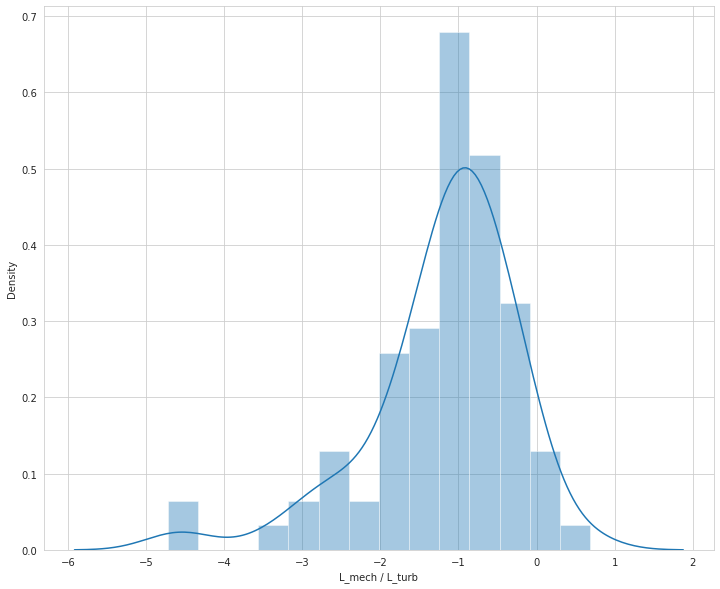

In [ ]:
.clouds_turb = QTable.read(filepath + '/data/outflowsClouds_Energy_turb2.fit')
clouds_turb
clouds_turb_ =  clouds_turb.to_pandas().dropna()
clouds_turb_['power_ratio'] = clouds_turb_['Outflow_Lum_mech']/(clouds_turb_['Cloud_Lum_turb']*1)
clouds_turb_ = clouds_turb_[clouds_turb_['power_ratio']>0]
print('average power ratio = ', np.log10(np.nanmean(clouds_turb_['power_ratio'])))

plt.figure(figsize=(12,10))
sns.distplot(np.log10(clouds_turb_['power_ratio']),axlabel='L_mech / L_turb')
plt.savefig('')

average power ratio =  -1.0093284947912529


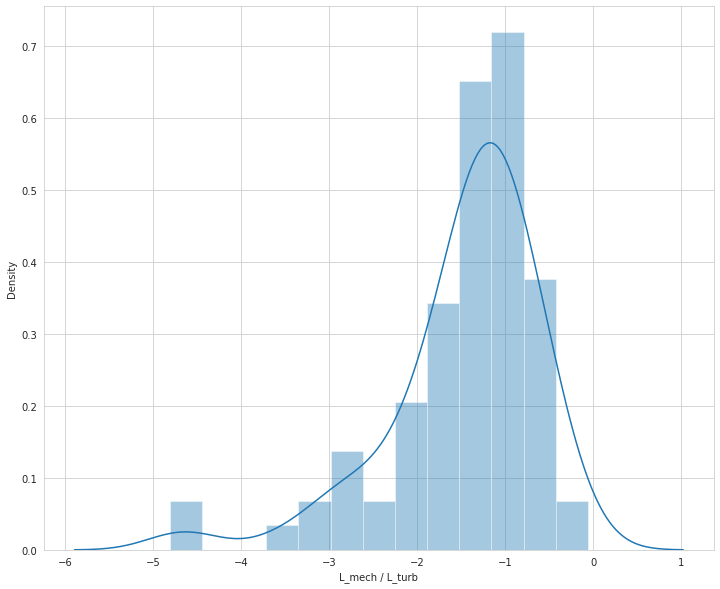

In [ ]:
clouds_turb = QTable.read(filepath + '/data/outflowsClouds_Energy_turb1.fit')
clouds_turb
clouds_turb_ =  clouds_turb.to_pandas().dropna()
clouds_turb_['power_ratio'] = clouds_turb_['Outflow_Lum_mech']/(clouds_turb_['Cloud_Lum_turb']*1)
clouds_turb_ = clouds_turb_[clouds_turb_['power_ratio']>0]
print('average power ratio = ', np.log10(np.nanmean(clouds_turb_['power_ratio'])))

plt.figure(figsize=(12,10))
sns.distplot(np.log10(clouds_turb_['power_ratio']),axlabel='L_mech / L_turb')

INFO: Setting slices=[0] [aplpy.core]
INFO: Auto-setting vmin to -1.628e+01 [aplpy.core]
INFO: Auto-setting vmax to  6.980e+01 [aplpy.core]
k-value= 0 
 l: 0 m: 0
k-value= 1 
 l: 0 m: 1
k-value= 2 
 l: 0 m: 2
k-value= 3 
 l: 0 m: 3
k-value= 4 
 l: 0 m: 4
k-value= 5 
 l: 0 m: 5
k-value= 6 
 l: 0 m: 6
k-value= 7 
 l: 0 m: 7
k-value= 8 
 l: 0 m: 8
k-value= 9 
 l: 0 m: 9
k-value= 10 
 l: 0 m: 10
k-value= 11 
 l: 0 m: 11
k-value= 12 
 l: 0 m: 12
k-value= 13 
 l: 0 m: 13
k-value= 14 
 l: 0 m: 14
k-value= 15 
 l: 0 m: 15
k-value= 16 
 l: 0 m: 16
k-value= 17 
 l: 0 m: 17
k-value= 18 
 l: 0 m: 18
k-value= 19 
 l: 0 m: 19
k-value= 20 
 l: 1 m: 0
k-value= 21 
 l: 1 m: 1
k-value= 22 
 l: 1 m: 2
k-value= 23 
 l: 1 m: 3
k-value= 24 
 l: 1 m: 4
k-value= 25 
 l: 1 m: 5
k-value= 26 
 l: 1 m: 6
k-value= 27 
 l: 1 m: 7
k-value= 28 
 l: 1 m: 8
k-value= 29 
 l: 1 m: 9
k-value= 30 
 l: 1 m: 10
k-value= 31 
 l: 1 m: 11
k-value= 32 
 l: 1 m: 12
k-value= 33 
 l: 1 m: 13
k-value= 34 
 l: 1 m: 14
k-value= 35 
 l

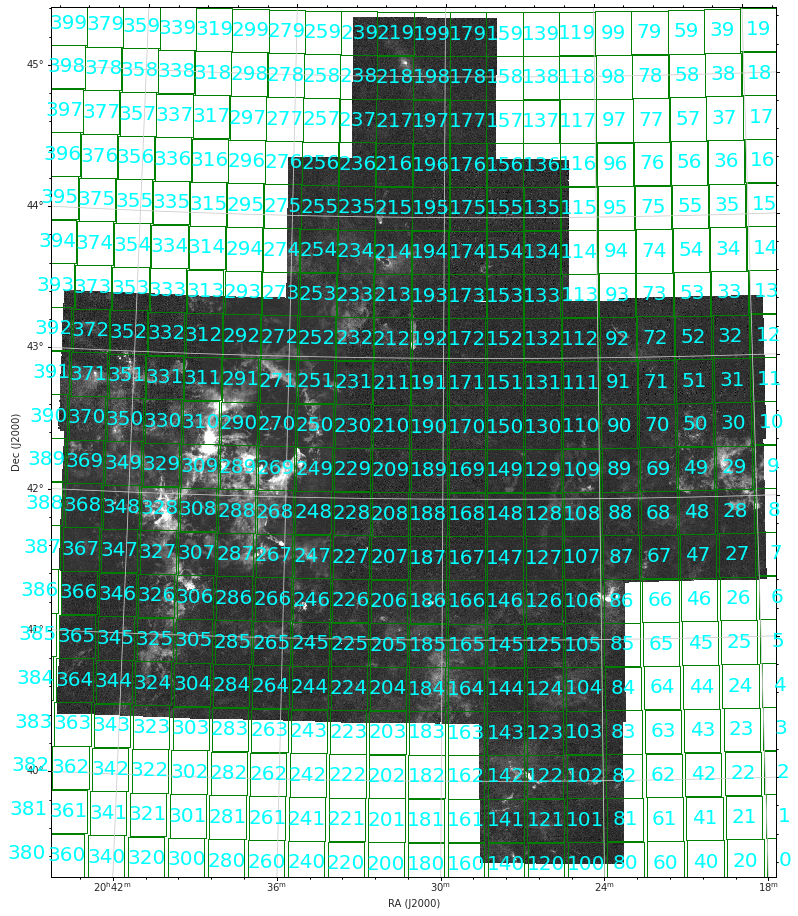

In [24]:
#################################################################################################################################################################################################################################################
#################################################################################################################################################################################################################################################
################################################                                                     ############################################################################################################################################
################################################    POWER IN CLOUD CLUMPS TURBULENCE ENERGY          ############################################################################################################################################
################################################    LARGER GRIDS EACH with multiple outflows         ############################################################################################################################################
################################################                                                     ############################################################################################################################################
#################################################################################################################################################################################################################################################
#################################################################################################################################################################################################################################################
%%time
from astropy.nddata import Cutout2D
from numpy import meshgrid
import sys 
import os
sys.path.append(filepath + '/data')
from cygFn import f, length, Jnu, G, Quad
## For plotting
import matplotlib.pyplot as plt
import seaborn as sns
# This is new, it will allow us to interact with 3d plots in the notebook
from mpl_toolkits.mplot3d import Axes3D
## This sets the plot style to have a grid on a white background
sns.set_style("whitegrid")
from pandas.plotting import scatter_matrix

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
warnings.filterwarnings('ignore', category=UserWarning, append=True)

# constants >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
nu = 330.588 * u.GHz
Tbg = 2.73 * u.K
Aul = 6.038e-7 / u.s
B0 = 54891.42 * u.MHz
E3 = 30 * u.K
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

outflows = outflowsF # QTable.read('table_newfields_input.fit') ### CHANGE FIELD NAME ###
N = 20
n_of = np.zeros(N**2)
L_mech_tot = np.zeros(N**2) * u.solLum
dist = np.zeros(N**2) * u.kpc


xmin = co.world_extrema[0][0] # 304.157172*u.deg
xmax = co.world_extrema[0][1] #311.481944*u.deg
ymin = co.world_extrema[1][0] #39.256583*u.deg 
ymax = co.world_extrema[1][1] #45.458596*u.deg
dx = np.abs(xmax - xmin) / N
dy = np.abs(ymax - ymin) / N

t = QTable(names=('Seq','L_mech_tot','Cloud_Mass','Cloud_En_turb','Cloud_Lum_turb'),
           dtype=('i8','f8','f8','f8','f8')) 
counter = 0

w0 = co.shape[2]/N # this is because cubes have vel, y/Dec, x/RA data in this order
h0 = co.shape[1]/N

#w0_21cm = cygx21cm.shape[2]/N # this is because cubes have vel, y/Dec, x/RA data in this order
#h0_21cm = cygx21cm.shape[1]/N

f = aplpy.FITSFigure(co_mom0.hdu,figsize=(18, 16))
f.show_grayscale()

# >>>>>> this part for displaying proto_flat and sf regions >>>>>>>>>>>>>>>>>>
# pixel size in deg 
        
ang_width = 1 * 14.6 * u.arcsec
cdelt = utils.proj_plane_pixel_scales(co.wcs)
width = (ang_width*0.5 / (cdelt[0] * u.deg)).to(u.dimensionless_unscaled).value
dv = cdelt[2]*1e-6*u.km/u.s
vlo1 = - 8.0*u.km/u.s # low negative velocity range: -8 =< v < 0
vhi1 = 1*u.km/u.s
# high positive velocity range: v > 8
vlo3 = 7*u.km/u.s + dv
vhi3 = 30*u.km/u.s
# >>>>>>>>>>>>>>>> GRIDS >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
k = 0
for l in range(N):
    for m in range(N):
        
        # TASK1: this extracts pixels based on 12co cube coordinates and slices segments from 12co map 
        lon_range = [xmin+l*dx, xmin+(l+1)*dx]
        lat_range = [ymin+m*dy, ymin+(m+1)*dy]
        
        xw = (lon_range[0]+lon_range[1])/2
        yw = (lat_range[0]+lat_range[1])/2
        
        x0, y0, _ = co.wcs.wcs_world2pix(xw, yw, 0, 0)
        f.show_rectangles(x0, y0, w0, h0, angle=0, layer=False, zorder=None,
                          coords_frame='pixel', edgecolor='green')
        f.add_label(xw.value, yw.value, str(k), color='cyan', size=20)

        position = (x0, y0)
        size = (w0, h0)     # pixels

        if l < N-1:
          lon_range = [xmin+l*dx, xmin+(l+1)*dx]
        elif l==N-1:
          lon_range = [xmin+l*1.005*dx, xmin+(l+1)*0.95*dx]

        print('k-value=',k,'\n', 'l:', l,'m:',m)
        try:
            #########################    sum outflow L_mech in each grid    ##########################################
            for z in range(0,len(outflows)):
              s1 = (outflows[z]['RAJ2000'] > xmin+(l*dx)) & (outflows[z]['RAJ2000'] < xmin+((l+1)*dx))
              s2 = (outflows[z]['DecJ2000'] > ymin+(m*dy)) & (outflows[z]['DecJ2000'] < ymin+((m+1)*dy))
              #s3 = (outflows.loc[z]['Distance'] != 0.65)
              if (s1 and s2) == True: # and s3
                  n_of[k] +=1
                  dist[k] += outflows[z]['Distance']
                  #dist[k] = dist[k] / n_of[k]                  
                  if outflows[z]['L_mech'] is NaN:
                    pass
                  else:
                    L_mech_tot[k] += outflows[z]['L_mech']
              else: 
                pass
        except IndexError:
          pass
          
        k +=1
        print('========================')
print(L_mech_tot)

dist_avg = dist/n_of
print(n_of)
print(dist_avg[n_of>0])

In [28]:
## >>>>>>>>>>>>>>> vectorization 

sys.path.append(filepath + '/data')
from N13mass import mass
# multiprocessing.Process(target= sleepy_man)
k =0
N=20
energy_cloud = np.zeros(N**2) 
lum_cloud = np.zeros(N**2) * u.solLum

for l in range(N):
    for m in range(N):
        #l=7
        #m=5
        print('current grid:',l,m,'and loop=',k)
        # TASK1: this extracts pixels based on 12co cube coordinates and slices segments from 12co map 
        lon_range = [xmin+l*dx, xmin+(l+1)*dx]
        lat_range = [ymin+m*dy, ymin+(m+1)*dy]
        
        xw = (lon_range[0]+lon_range[1])/2 # grid mid-point 
        yw = (lat_range[0]+lat_range[1])/2
        
        x0, y0, _ = co.wcs.wcs_world2pix(xw, yw, 0, 0)
        if l < N:
          lon_range = [xmin+l*dx, xmin+(l+1)*dx]
        elif l==N:
          lon_range = [xmin+l*1.005*dx, xmin+(l+1)*0.95*dx]

        print('k-value=',k,'\n')
        try:
            #########################    Cloud energy calc.    ##########################################
            sub_cube_co = co.subcube(xlo=lon_range[0], xhi=lon_range[1], ylo=lat_range[0], yhi=lat_range[1])
            ##>>>>>>>>>>> here goes energy for outflows and clouds
            if n_of[k] > 0:
              #do this  >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
              print('outflow number', n_of[k]) 
              RA = outflows[z]['RAJ2000'].value 
              Dec = outflows[z]['DecJ2000'].value
              
              # 4 beamsize in pix 
              #boxC = ((8 * cdelt[0]*u.deg)/(cdelt[0]*u.deg)).to(u.dimensionless_unscaled).value
              cloud = sub_cube_co #co[:, int(y0-boxC):int(y0+boxC), int(x0-boxC):int(x0+boxC)] # <<<-----------------------------


              cloudshape = cloud[0].shape # x, y axes dimensions 
              vaxis=cloud.spectral_axis.value 
                   
              v0array = np.zeros(cloudshape)
              sig0array = np.zeros(cloudshape)
              amparray= np.zeros(cloudshape)
              from astropy import units as u
              
              ## >>>>>>>>>>>>>  MAKE A FUNCTION >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
              Tpeak = cloud.max(axis=0) * u.K   # <<<<--- change to u.K for big cube --->>>>
              nu = 330.588 * u.GHz
              Tbg = 2.73 * u.K
              Aul = 6.038e-7 / u.s
              B0 = 54891.42 * u.MHz
              E3 = 30 * u.K
              Tex = ((con.h * nu / con.k_B)
                      / np.log(1 + con.h * nu
                              / (con.k_B * (Tpeak + Jnu(Tbg, nu=nu)))))
              Tex = Tex.to(u.K)
              co13cloud = np.zeros_like(cloud)

              DeltaNu = np.abs((vaxis[1] - vaxis[0]) * u.km / u.s/ con.c * nu).to(u.Hz)
              DeltaV = np.abs((vaxis[1] - vaxis[0]) * u.km/u.s)

              log_co13cloud = 2.074571 * np.log10(cloud) - 2.699635
              co13cloud=10**log_co13cloud

              tau13dnu = co13cloud * DeltaV 

              N13co = (8 * np.pi * nu**3 / con.c**3 / Aul
                              /(np.exp(con.h * nu / con.k_B / Tex) - 1) * tau13dnu
                              )
              Qrot = con.k_B * Tex / (con.h * B0) * np.exp(con.h * B0
                                                                      / (3 * con.k_B * Tex))

              N13coTot = Qrot / 7 * np.exp(E3 / Tex) * N13co # g_u=7 for u=3, l=2 transition Qrot

              NH2 = (7.5e5 * N13coTot).to(u.cm**(-2))

              apix = np.prod(
                    np.abs(np.array([width, 1]) 
                            * (sub_cube_co.wcs.celestial.wcs.get_cdelt())
                        / 180 * np.pi *outflows[z]['Distance'].value)) * u.kpc**2
              Mass = (NH2 * con.m_n * 2.32 * apix).to(u.solMass)
              print('Mass dimensions:',Mass.shape)             

              #Mass = mass(cloud)
              # >>>>>>>>>>>>>>>>>>>>  FUNCTION    >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

              
              #### sigma calculation 
              Tpeak=np.ones(cloudshape)
              vpeak=np.ones(cloudshape) * u.km/u.s
              sigma=np.ones(cloudshape)
              vaxis=cloud.spectral_axis.value
              # .............................. LOOP 1 ......................................................
              spec = cloud # removes unit=K
              Tpeak = np.nanmax(spec,axis=0)
              
              #if sum(np.isnan(spec)) == len(spec): # condtion for all NaN-pixel
               # print('NaN pixel')
               # pass
              # else:                  
              try:
                ai = np.nanargmax(spec, axis=0)
                vpeak = vaxis[ai] * u.km/u.s
              except ValueError :
                pass
              
              hf = Tpeak/2

              slice_unmasked = cloud.unmasked_data[:,:,:]  
              velo, dec, ra = cloud.world[:] 
              mask = slice_unmasked > hf
              border = np.logical_or(mask * np.roll(~mask, 1,axis=0),mask * np.roll(~mask, -1, axis=0))
              vcube = velo * 1
              vcube[~border] = np.nan
              dvcube_pos = vcube - vpeak[np.newaxis, :, :] #* u.km/u.s
              dvcube_neg = -1 * dvcube_pos
              dvcube_neg[dvcube_neg < 0] = np.nan
              dvcube_pos[dvcube_pos < 0] = np.nan
              dv_pos = np.nanmin(dvcube_pos, axis=0)
              dv_neg = np.nanmin(dvcube_neg, axis=0)
              HWHM = np.minimum(dv_pos, dv_neg)
              sigma = HWHM/((2*np.log(2))**0.5) 
              # ...............................................................................................            
              print("loop 1 done")  
             
              
              n=int(vaxis.shape[0]/2) #this integer must be less than spectral pixel number
              Energy = np.zeros(shape=(n, cloudshape[0],cloudshape[1]))*u.erg
              vcen = np.zeros(shape=(n, cloudshape[0],cloudshape[1])) 
              vcentr = np.zeros(cloudshape) # dim should be equal to the number of spatial pixels along the mass pv slice

              l1 = vpeak - 2*sigma # <<<<<<<<<<<<<<<<<<<<<<<<  SHOULD IT BE 5 ??? YES THIS RANGE IS JUST USED TO FIND E_MIN AT WHAT VEL
              u1 = vpeak + 2*sigma
              vcen = np.linspace(l1,u1,n) # half of spectral pixels     
              print("loop 2 done")  

                                        
              #if sum(np.isnan(spec)) == len(spec): # condtion for all NaN-pixel
                            #print('nan-pixel encountered in line center calc')
                #vcentr = np.nanmean(vcentr)
              #else:
                #print('non nan pixel')  
        
              for indx in range(n): ### <<<<<<<<<<<<<<<<<<<<<<< DOES NOT WORK FROM THIS LINE <<<<<<<-------------------------------------------------
                voff = vcen[indx, :, :] - (vaxis[:, np.newaxis, np.newaxis])*u.km/u.s#*u.km**2/u.s**2
                Energy[indx,:,:] = (np.nansum(Mass*voff**2)).to(u.erg)#SUM OVER vaxis for each of vcen VALUES  
                vcentr = vcen[np.nanargmin(Energy[indx,:,:])]
              print("loop 3 done")   

              from astropy import units as u
              energyC = np.zeros(cloudshape) * u.solMass * (u.km/u.s)**2
              turbLum = np.zeros(cloudshape) * u.solLum

              L = (( cloud.shape[0] * (cdelt[0] * u.deg)).to(u.rad)/(1*u.rad)).to(u.dimensionless_unscaled).value * (dist_avg[k])       #<<<<<<<<<<< size of cloud <<<<<<<<<<<<<<<<<<<<<<<<<<<<<
           
              #if sum(np.isnan(spec)) == len(spec): # condtion for all NaN-pixel                           
                  #massvecC = 0
                  #energyC = 0
              #else:  
              vaxis_new = vaxis[:, np.newaxis, np.newaxis]*u.km/u.s         
              voff = vcentr-vaxis_new
              idxC = (vaxis_new > vcentr - 3*sigma) & (vaxis_new < vcentr + 3*sigma)
              energyC = 0.5 * np.nansum(Mass[idxC] * voff[idxC]**2)
              turbLum = (np.nansum(Mass[idxC] * np.abs(voff[idxC])**3)/L).to(u.solLum)
              print('loop 4 done')   
              energy_cloud[k] = energyC.sum().to(u.erg)/(1e44*u.erg) # units of 1e44*u.erg *u.solMass*u.km**2/u.s**2)
              lum_cloud[k] = turbLum.sum()#.to(u.solLum)
              print('loop 5 done')
              #t.add_row([z+1, np.round(L_mech_tot,3), np.round(mass_cloud,3), np.round(energy_cloud,3), np.round(lum_cloud,3)])     
            else:
              pass
        except IndexError:
          pass
          
        k += 1
        print('going to next loop:',k)
        #break
########################################## HISTOGRAM ###########################################################################
cloud_energy = pd.DataFrame({'outflow_number': n_of, 'L_mech_tot (solLum)':L_mech_tot, 'cloud_energy(10^44 erg)':energy_cloud, 'cloud_turb_lum (solLum)': lum_cloud}).sort_values('outflow_number', ascending=False)#.dropna()
cloud_energy.to_csv(filepath + '/data/cloud_energy_biggrids400.csv')
print('grid size =', ((L/(1.5*u.kpc))*u.rad).to(u.arcmin))
cloud_energy= cloud_energy[cloud_energy['cloud_turb_lum (solLum)']>0]
cloud_energy['power_ratio'] = cloud_energy['L_mech_tot (solLum)']/(cloud_energy['cloud_turb_lum (solLum)']*1)
cloud_energy= cloud_energy[cloud_energy['power_ratio']>0]
#cloud_energy= cloud_energy[cloud_energy['power_ratio']<10e5]
print('average log power ratio = ', np.log10(np.nanmean(cloud_energy['power_ratio'])),'\n average power ratio',1/np.nanmean(cloud_energy['power_ratio']) )
print(cloud_energy['outflow_number'].sum())
plt.figure(figsize=(12,10))
sns.distplot(np.log10(cloud_energy['power_ratio']),axlabel='L_mech_tot / L_turb')
plt.savefig(filepath + '/output/power_ratio_400.pdf')

current grid: 0 0 and loop= 0
k-value= 0 

going to next loop: 1
current grid: 0 1 and loop= 1
k-value= 1 

going to next loop: 2
current grid: 0 2 and loop= 2
k-value= 2 

going to next loop: 3
current grid: 0 3 and loop= 3
k-value= 3 

going to next loop: 4
current grid: 0 4 and loop= 4
k-value= 4 

going to next loop: 5
current grid: 0 5 and loop= 5
k-value= 5 

going to next loop: 6
current grid: 0 6 and loop= 6
k-value= 6 

going to next loop: 7
current grid: 0 7 and loop= 7
k-value= 7 

going to next loop: 8
current grid: 0 8 and loop= 8
k-value= 8 

outflow number 2.0


/usr/local/lib/python3.7/dist-packages/spectral_cube/spectral_cube.py:443: RuntimeWarning: All-NaN slice encountered
  **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in log10


Mass dimensions: (98, 146, 75)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:102: RuntimeWarning: All-NaN axis encountered
<string>:6: RuntimeWarning: All-NaN axis encountered


loop 1 done
loop 2 done
loop 3 done
loop 4 done
loop 5 done
going to next loop: 9
current grid: 0 9 and loop= 9
k-value= 9 

going to next loop: 10
current grid: 0 10 and loop= 10
k-value= 10 

going to next loop: 11
current grid: 0 11 and loop= 11
k-value= 11 

going to next loop: 12
current grid: 0 12 and loop= 12
k-value= 12 

going to next loop: 13
current grid: 0 13 and loop= 13
k-value= 13 

going to next loop: 14
current grid: 0 14 and loop= 14
k-value= 14 

going to next loop: 15
current grid: 0 15 and loop= 15
k-value= 15 

going to next loop: 16
current grid: 0 16 and loop= 16
k-value= 16 

going to next loop: 17
current grid: 0 17 and loop= 17
k-value= 17 

going to next loop: 18
current grid: 0 18 and loop= 18
k-value= 18 

going to next loop: 19
current grid: 0 19 and loop= 19
k-value= 19 

going to next loop: 20
current grid: 1 0 and loop= 20
k-value= 20 

going to next loop: 21
current grid: 1 1 and loop= 21
k-value= 21 

going to next loop: 22
current grid: 1 2 and loop

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in log10


Mass dimensions: (98, 146, 137)
loop 1 done
loop 2 done
loop 3 done
loop 4 done
loop 5 done
going to next loop: 29
current grid: 1 9 and loop= 29
k-value= 29 

going to next loop: 30
current grid: 1 10 and loop= 30
k-value= 30 

going to next loop: 31
current grid: 1 11 and loop= 31
k-value= 31 

going to next loop: 32
current grid: 1 12 and loop= 32
k-value= 32 

going to next loop: 33
current grid: 1 13 and loop= 33
k-value= 33 

going to next loop: 34
current grid: 1 14 and loop= 34
k-value= 34 

going to next loop: 35
current grid: 1 15 and loop= 35
k-value= 35 

going to next loop: 36
current grid: 1 16 and loop= 36
k-value= 36 

going to next loop: 37
current grid: 1 17 and loop= 37
k-value= 37 

going to next loop: 38
current grid: 1 18 and loop= 38
k-value= 38 

going to next loop: 39
current grid: 1 19 and loop= 39
k-value= 39 

going to next loop: 40
current grid: 2 0 and loop= 40
k-value= 40 

going to next loop: 41
current grid: 2 1 and loop= 41
k-value= 41 

going to next 

/usr/local/lib/python3.7/dist-packages/spectral_cube/spectral_cube.py:443: RuntimeWarning: All-NaN slice encountered
  **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in log10


Mass dimensions: (98, 147, 137)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:102: RuntimeWarning: All-NaN axis encountered
<string>:6: RuntimeWarning: All-NaN axis encountered


loop 1 done
loop 2 done
loop 3 done
loop 4 done
loop 5 done
going to next loop: 47
current grid: 2 7 and loop= 47
k-value= 47 

going to next loop: 48
current grid: 2 8 and loop= 48
k-value= 48 

outflow number 1.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in log10


Mass dimensions: (98, 147, 135)
loop 1 done
loop 2 done
loop 3 done
loop 4 done
loop 5 done
going to next loop: 49
current grid: 2 9 and loop= 49
k-value= 49 

going to next loop: 50
current grid: 2 10 and loop= 50
k-value= 50 

outflow number 1.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in log10


Mass dimensions: (98, 147, 135)
loop 1 done
loop 2 done
loop 3 done
loop 4 done
loop 5 done
going to next loop: 51
current grid: 2 11 and loop= 51
k-value= 51 

going to next loop: 52
current grid: 2 12 and loop= 52
k-value= 52 

going to next loop: 53
current grid: 2 13 and loop= 53
k-value= 53 

going to next loop: 54
current grid: 2 14 and loop= 54
k-value= 54 

going to next loop: 55
current grid: 2 15 and loop= 55
k-value= 55 

going to next loop: 56
current grid: 2 16 and loop= 56
k-value= 56 

going to next loop: 57
current grid: 2 17 and loop= 57
k-value= 57 

going to next loop: 58
current grid: 2 18 and loop= 58
k-value= 58 

going to next loop: 59
current grid: 2 19 and loop= 59
k-value= 59 

going to next loop: 60
current grid: 3 0 and loop= 60
k-value= 60 

going to next loop: 61
current grid: 3 1 and loop= 61
k-value= 61 

going to next loop: 62
current grid: 3 2 and loop= 62
k-value= 62 

going to next loop: 63
current grid: 3 3 and loop= 63
k-value= 63 

going to next l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in log10


Mass dimensions: (98, 148, 135)
loop 1 done
loop 2 done
loop 3 done
loop 4 done
loop 5 done
going to next loop: 68
current grid: 3 8 and loop= 68
k-value= 68 

going to next loop: 69
current grid: 3 9 and loop= 69
k-value= 69 

going to next loop: 70
current grid: 3 10 and loop= 70
k-value= 70 

going to next loop: 71
current grid: 3 11 and loop= 71
k-value= 71 

going to next loop: 72
current grid: 3 12 and loop= 72
k-value= 72 

going to next loop: 73
current grid: 3 13 and loop= 73
k-value= 73 

going to next loop: 74
current grid: 3 14 and loop= 74
k-value= 74 

going to next loop: 75
current grid: 3 15 and loop= 75
k-value= 75 

going to next loop: 76
current grid: 3 16 and loop= 76
k-value= 76 

going to next loop: 77
current grid: 3 17 and loop= 77
k-value= 77 

going to next loop: 78
current grid: 3 18 and loop= 78
k-value= 78 

going to next loop: 79
current grid: 3 19 and loop= 79
k-value= 79 

going to next loop: 80
current grid: 4 0 and loop= 80
k-value= 80 

going to next 

/usr/local/lib/python3.7/dist-packages/spectral_cube/spectral_cube.py:443: RuntimeWarning: All-NaN slice encountered
  **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in log10


Mass dimensions: (98, 148, 136)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:102: RuntimeWarning: All-NaN axis encountered
<string>:6: RuntimeWarning: All-NaN axis encountered


loop 1 done
loop 2 done
loop 3 done
loop 4 done
loop 5 done
going to next loop: 87
current grid: 4 7 and loop= 87
k-value= 87 

going to next loop: 88
current grid: 4 8 and loop= 88
k-value= 88 

going to next loop: 89
current grid: 4 9 and loop= 89
k-value= 89 

going to next loop: 90
current grid: 4 10 and loop= 90
k-value= 90 

going to next loop: 91
current grid: 4 11 and loop= 91
k-value= 91 

going to next loop: 92
current grid: 4 12 and loop= 92
k-value= 92 

going to next loop: 93
current grid: 4 13 and loop= 93
k-value= 93 

going to next loop: 94
current grid: 4 14 and loop= 94
k-value= 94 

going to next loop: 95
current grid: 4 15 and loop= 95
k-value= 95 

going to next loop: 96
current grid: 4 16 and loop= 96
k-value= 96 

going to next loop: 97
current grid: 4 17 and loop= 97
k-value= 97 

going to next loop: 98
current grid: 4 18 and loop= 98
k-value= 98 

going to next loop: 99
current grid: 4 19 and loop= 99
k-value= 99 

going to next loop: 100
current grid: 5 0 and 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in log10


Mass dimensions: (98, 149, 133)
loop 1 done
loop 2 done
loop 3 done
loop 4 done
loop 5 done
going to next loop: 110
current grid: 5 10 and loop= 110
k-value= 110 

outflow number 2.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in log10


Mass dimensions: (98, 148, 132)
loop 1 done
loop 2 done
loop 3 done
loop 4 done
loop 5 done
going to next loop: 111
current grid: 5 11 and loop= 111
k-value= 111 

going to next loop: 112
current grid: 5 12 and loop= 112
k-value= 112 

going to next loop: 113
current grid: 5 13 and loop= 113
k-value= 113 

going to next loop: 114
current grid: 5 14 and loop= 114
k-value= 114 

going to next loop: 115
current grid: 5 15 and loop= 115
k-value= 115 

going to next loop: 116
current grid: 5 16 and loop= 116
k-value= 116 

going to next loop: 117
current grid: 5 17 and loop= 117
k-value= 117 

going to next loop: 118
current grid: 5 18 and loop= 118
k-value= 118 

going to next loop: 119
current grid: 5 19 and loop= 119
k-value= 119 

going to next loop: 120
current grid: 6 0 and loop= 120
k-value= 120 

going to next loop: 121
current grid: 6 1 and loop= 121
k-value= 121 

going to next loop: 122
current grid: 6 2 and loop= 122
k-value= 122 

going to next loop: 123
current grid: 6 3 and l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in log10


Mass dimensions: (98, 150, 135)
loop 1 done
loop 2 done
loop 3 done
loop 4 done
loop 5 done
going to next loop: 145
current grid: 7 5 and loop= 145
k-value= 145 

going to next loop: 146
current grid: 7 6 and loop= 146
k-value= 146 

going to next loop: 147
current grid: 7 7 and loop= 147
k-value= 147 

going to next loop: 148
current grid: 7 8 and loop= 148
k-value= 148 

going to next loop: 149
current grid: 7 9 and loop= 149
k-value= 149 

going to next loop: 150
current grid: 7 10 and loop= 150
k-value= 150 

going to next loop: 151
current grid: 7 11 and loop= 151
k-value= 151 

going to next loop: 152
current grid: 7 12 and loop= 152
k-value= 152 

going to next loop: 153
current grid: 7 13 and loop= 153
k-value= 153 

going to next loop: 154
current grid: 7 14 and loop= 154
k-value= 154 

going to next loop: 155
current grid: 7 15 and loop= 155
k-value= 155 

going to next loop: 156
current grid: 7 16 and loop= 156
k-value= 156 

going to next loop: 157
current grid: 7 17 and lo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in log10


Mass dimensions: (98, 151, 134)
loop 1 done
loop 2 done
loop 3 done
loop 4 done
loop 5 done
going to next loop: 165
current grid: 8 5 and loop= 165
k-value= 165 

going to next loop: 166
current grid: 8 6 and loop= 166
k-value= 166 

going to next loop: 167
current grid: 8 7 and loop= 167
k-value= 167 

going to next loop: 168
current grid: 8 8 and loop= 168
k-value= 168 

going to next loop: 169
current grid: 8 9 and loop= 169
k-value= 169 

going to next loop: 170
current grid: 8 10 and loop= 170
k-value= 170 

going to next loop: 171
current grid: 8 11 and loop= 171
k-value= 171 

going to next loop: 172
current grid: 8 12 and loop= 172
k-value= 172 

going to next loop: 173
current grid: 8 13 and loop= 173
k-value= 173 

going to next loop: 174
current grid: 8 14 and loop= 174
k-value= 174 

going to next loop: 175
current grid: 8 15 and loop= 175
k-value= 175 

going to next loop: 176
current grid: 8 16 and loop= 176
k-value= 176 

going to next loop: 177
current grid: 8 17 and lo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in log10


Mass dimensions: (98, 151, 133)
loop 1 done
loop 2 done
loop 3 done
loop 4 done
loop 5 done
going to next loop: 186
current grid: 9 6 and loop= 186
k-value= 186 

outflow number 1.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in log10


Mass dimensions: (98, 151, 132)
loop 1 done
loop 2 done
loop 3 done
loop 4 done
loop 5 done
going to next loop: 187
current grid: 9 7 and loop= 187
k-value= 187 

going to next loop: 188
current grid: 9 8 and loop= 188
k-value= 188 

going to next loop: 189
current grid: 9 9 and loop= 189
k-value= 189 

going to next loop: 190
current grid: 9 10 and loop= 190
k-value= 190 

going to next loop: 191
current grid: 9 11 and loop= 191
k-value= 191 

going to next loop: 192
current grid: 9 12 and loop= 192
k-value= 192 

outflow number 2.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in log10


Mass dimensions: (98, 150, 128)
loop 1 done
loop 2 done
loop 3 done
loop 4 done
loop 5 done
going to next loop: 193
current grid: 9 13 and loop= 193
k-value= 193 

going to next loop: 194
current grid: 9 14 and loop= 194
k-value= 194 

going to next loop: 195
current grid: 9 15 and loop= 195
k-value= 195 

going to next loop: 196
current grid: 9 16 and loop= 196
k-value= 196 

going to next loop: 197
current grid: 9 17 and loop= 197
k-value= 197 

going to next loop: 198
current grid: 9 18 and loop= 198
k-value= 198 

going to next loop: 199
current grid: 9 19 and loop= 199
k-value= 199 

going to next loop: 200
current grid: 10 0 and loop= 200
k-value= 200 

going to next loop: 201
current grid: 10 1 and loop= 201
k-value= 201 

going to next loop: 202
current grid: 10 2 and loop= 202
k-value= 202 

going to next loop: 203
current grid: 10 3 and loop= 203
k-value= 203 

going to next loop: 204
current grid: 10 4 and loop= 204
k-value= 204 

going to next loop: 205
current grid: 10 5 a

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in log10


Mass dimensions: (98, 151, 132)
loop 1 done
loop 2 done
loop 3 done
loop 4 done
loop 5 done
going to next loop: 206
current grid: 10 6 and loop= 206
k-value= 206 

outflow number 1.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in log10


Mass dimensions: (98, 151, 131)
loop 1 done
loop 2 done
loop 3 done
loop 4 done
loop 5 done
going to next loop: 207
current grid: 10 7 and loop= 207
k-value= 207 

going to next loop: 208
current grid: 10 8 and loop= 208
k-value= 208 

going to next loop: 209
current grid: 10 9 and loop= 209
k-value= 209 

going to next loop: 210
current grid: 10 10 and loop= 210
k-value= 210 

going to next loop: 211
current grid: 10 11 and loop= 211
k-value= 211 

going to next loop: 212
current grid: 10 12 and loop= 212
k-value= 212 

going to next loop: 213
current grid: 10 13 and loop= 213
k-value= 213 

going to next loop: 214
current grid: 10 14 and loop= 214
k-value= 214 

outflow number 2.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in log10


Mass dimensions: (98, 152, 127)
loop 1 done
loop 2 done
loop 3 done
loop 4 done
loop 5 done
going to next loop: 215
current grid: 10 15 and loop= 215
k-value= 215 

outflow number 1.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in log10


Mass dimensions: (98, 152, 126)
loop 1 done
loop 2 done
loop 3 done
loop 4 done
loop 5 done
going to next loop: 216
current grid: 10 16 and loop= 216
k-value= 216 

going to next loop: 217
current grid: 10 17 and loop= 217
k-value= 217 

going to next loop: 218
current grid: 10 18 and loop= 218
k-value= 218 

outflow number 1.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in log10


Mass dimensions: (98, 151, 124)
loop 1 done
loop 2 done
loop 3 done
loop 4 done
loop 5 done
going to next loop: 219
current grid: 10 19 and loop= 219
k-value= 219 

going to next loop: 220
current grid: 11 0 and loop= 220
k-value= 220 

going to next loop: 221
current grid: 11 1 and loop= 221
k-value= 221 

going to next loop: 222
current grid: 11 2 and loop= 222
k-value= 222 

going to next loop: 223
current grid: 11 3 and loop= 223
k-value= 223 

going to next loop: 224
current grid: 11 4 and loop= 224
k-value= 224 

going to next loop: 225
current grid: 11 5 and loop= 225
k-value= 225 

going to next loop: 226
current grid: 11 6 and loop= 226
k-value= 226 

going to next loop: 227
current grid: 11 7 and loop= 227
k-value= 227 

going to next loop: 228
current grid: 11 8 and loop= 228
k-value= 228 

going to next loop: 229
current grid: 11 9 and loop= 229
k-value= 229 

going to next loop: 230
current grid: 11 10 and loop= 230
k-value= 230 

going to next loop: 231
current grid: 11 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in log10


Mass dimensions: (98, 152, 125)
loop 1 done
loop 2 done
loop 3 done
loop 4 done
loop 5 done
going to next loop: 235
current grid: 11 15 and loop= 235
k-value= 235 

going to next loop: 236
current grid: 11 16 and loop= 236
k-value= 236 

going to next loop: 237
current grid: 11 17 and loop= 237
k-value= 237 

going to next loop: 238
current grid: 11 18 and loop= 238
k-value= 238 

going to next loop: 239
current grid: 11 19 and loop= 239
k-value= 239 

going to next loop: 240
current grid: 12 0 and loop= 240
k-value= 240 

going to next loop: 241
current grid: 12 1 and loop= 241
k-value= 241 

going to next loop: 242
current grid: 12 2 and loop= 242
k-value= 242 

going to next loop: 243
current grid: 12 3 and loop= 243
k-value= 243 

going to next loop: 244
current grid: 12 4 and loop= 244
k-value= 244 

outflow number 1.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in log10


Mass dimensions: (98, 153, 132)
loop 1 done
loop 2 done
loop 3 done
loop 4 done
loop 5 done
going to next loop: 245
current grid: 12 5 and loop= 245
k-value= 245 

outflow number 2.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in log10


Mass dimensions: (98, 153, 131)
loop 1 done
loop 2 done
loop 3 done
loop 4 done
loop 5 done
going to next loop: 246
current grid: 12 6 and loop= 246
k-value= 246 

outflow number 1.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in log10


Mass dimensions: (98, 153, 130)
loop 1 done
loop 2 done
loop 3 done
loop 4 done
loop 5 done
going to next loop: 247
current grid: 12 7 and loop= 247
k-value= 247 

going to next loop: 248
current grid: 12 8 and loop= 248
k-value= 248 

going to next loop: 249
current grid: 12 9 and loop= 249
k-value= 249 

outflow number 1.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in log10


Mass dimensions: (98, 153, 128)
loop 1 done
loop 2 done
loop 3 done
loop 4 done
loop 5 done
going to next loop: 250
current grid: 12 10 and loop= 250
k-value= 250 

going to next loop: 251
current grid: 12 11 and loop= 251
k-value= 251 

going to next loop: 252
current grid: 12 12 and loop= 252
k-value= 252 

going to next loop: 253
current grid: 12 13 and loop= 253
k-value= 253 

going to next loop: 254
current grid: 12 14 and loop= 254
k-value= 254 

going to next loop: 255
current grid: 12 15 and loop= 255
k-value= 255 

going to next loop: 256
current grid: 12 16 and loop= 256
k-value= 256 

going to next loop: 257
current grid: 12 17 and loop= 257
k-value= 257 

going to next loop: 258
current grid: 12 18 and loop= 258
k-value= 258 

going to next loop: 259
current grid: 12 19 and loop= 259
k-value= 259 

going to next loop: 260
current grid: 13 0 and loop= 260
k-value= 260 

going to next loop: 261
current grid: 13 1 and loop= 261
k-value= 261 

going to next loop: 262
current gr

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in log10


Mass dimensions: (98, 153, 129)
loop 1 done
loop 2 done
loop 3 done
loop 4 done
loop 5 done
going to next loop: 268
current grid: 13 8 and loop= 268
k-value= 268 

outflow number 1.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in log10


Mass dimensions: (98, 153, 128)
loop 1 done
loop 2 done
loop 3 done
loop 4 done
loop 5 done
going to next loop: 269
current grid: 13 9 and loop= 269
k-value= 269 

outflow number 3.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in log10


Mass dimensions: (98, 153, 128)
loop 1 done
loop 2 done
loop 3 done
loop 4 done
loop 5 done
going to next loop: 270
current grid: 13 10 and loop= 270
k-value= 270 

outflow number 1.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in log10


Mass dimensions: (98, 153, 127)
loop 1 done
loop 2 done
loop 3 done
loop 4 done
loop 5 done
going to next loop: 271
current grid: 13 11 and loop= 271
k-value= 271 

outflow number 1.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in log10


Mass dimensions: (98, 153, 127)
loop 1 done
loop 2 done
loop 3 done
loop 4 done
loop 5 done
going to next loop: 272
current grid: 13 12 and loop= 272
k-value= 272 

going to next loop: 273
current grid: 13 13 and loop= 273
k-value= 273 

going to next loop: 274
current grid: 13 14 and loop= 274
k-value= 274 

going to next loop: 275
current grid: 13 15 and loop= 275
k-value= 275 

going to next loop: 276
current grid: 13 16 and loop= 276
k-value= 276 

going to next loop: 277
current grid: 13 17 and loop= 277
k-value= 277 

going to next loop: 278
current grid: 13 18 and loop= 278
k-value= 278 

going to next loop: 279
current grid: 13 19 and loop= 279
k-value= 279 

going to next loop: 280
current grid: 14 0 and loop= 280
k-value= 280 

going to next loop: 281
current grid: 14 1 and loop= 281
k-value= 281 

going to next loop: 282
current grid: 14 2 and loop= 282
k-value= 282 

going to next loop: 283
current grid: 14 3 and loop= 283
k-value= 283 

going to next loop: 284
current grid

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in log10


Mass dimensions: (98, 154, 128)
loop 1 done
loop 2 done
loop 3 done
loop 4 done
loop 5 done
going to next loop: 288
current grid: 14 8 and loop= 288
k-value= 288 

going to next loop: 289
current grid: 14 9 and loop= 289
k-value= 289 

outflow number 5.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in log10


Mass dimensions: (98, 154, 127)
loop 1 done
loop 2 done
loop 3 done
loop 4 done
loop 5 done
going to next loop: 290
current grid: 14 10 and loop= 290
k-value= 290 

outflow number 6.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in log10


Mass dimensions: (98, 154, 126)
loop 1 done
loop 2 done
loop 3 done
loop 4 done
loop 5 done
going to next loop: 291
current grid: 14 11 and loop= 291
k-value= 291 

outflow number 2.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in log10


Mass dimensions: (98, 154, 125)
loop 1 done
loop 2 done
loop 3 done
loop 4 done
loop 5 done
going to next loop: 292
current grid: 14 12 and loop= 292
k-value= 292 

going to next loop: 293
current grid: 14 13 and loop= 293
k-value= 293 

going to next loop: 294
current grid: 14 14 and loop= 294
k-value= 294 

going to next loop: 295
current grid: 14 15 and loop= 295
k-value= 295 

going to next loop: 296
current grid: 14 16 and loop= 296
k-value= 296 

going to next loop: 297
current grid: 14 17 and loop= 297
k-value= 297 

going to next loop: 298
current grid: 14 18 and loop= 298
k-value= 298 

going to next loop: 299
current grid: 14 19 and loop= 299
k-value= 299 

going to next loop: 300
current grid: 15 0 and loop= 300
k-value= 300 

going to next loop: 301
current grid: 15 1 and loop= 301
k-value= 301 

going to next loop: 302
current grid: 15 2 and loop= 302
k-value= 302 

going to next loop: 303
current grid: 15 3 and loop= 303
k-value= 303 

going to next loop: 304
current grid

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in log10


Mass dimensions: (98, 154, 129)
loop 1 done
loop 2 done
loop 3 done
loop 4 done
loop 5 done
going to next loop: 307
current grid: 15 7 and loop= 307
k-value= 307 

going to next loop: 308
current grid: 15 8 and loop= 308
k-value= 308 

going to next loop: 309
current grid: 15 9 and loop= 309
k-value= 309 

outflow number 3.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in log10


Mass dimensions: (98, 154, 127)
loop 1 done
loop 2 done
loop 3 done
loop 4 done
loop 5 done
going to next loop: 310
current grid: 15 10 and loop= 310
k-value= 310 

outflow number 1.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in log10


Mass dimensions: (98, 154, 125)
loop 1 done
loop 2 done
loop 3 done
loop 4 done
loop 5 done
going to next loop: 311
current grid: 15 11 and loop= 311
k-value= 311 

going to next loop: 312
current grid: 15 12 and loop= 312
k-value= 312 

going to next loop: 313
current grid: 15 13 and loop= 313
k-value= 313 

going to next loop: 314
current grid: 15 14 and loop= 314
k-value= 314 

going to next loop: 315
current grid: 15 15 and loop= 315
k-value= 315 

going to next loop: 316
current grid: 15 16 and loop= 316
k-value= 316 

going to next loop: 317
current grid: 15 17 and loop= 317
k-value= 317 

going to next loop: 318
current grid: 15 18 and loop= 318
k-value= 318 

going to next loop: 319
current grid: 15 19 and loop= 319
k-value= 319 

going to next loop: 320
current grid: 16 0 and loop= 320
k-value= 320 

going to next loop: 321
current grid: 16 1 and loop= 321
k-value= 321 

going to next loop: 322
current grid: 16 2 and loop= 322
k-value= 322 

going to next loop: 323
current gri

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in log10


Mass dimensions: (98, 155, 127)
loop 1 done
loop 2 done
loop 3 done
loop 4 done
loop 5 done
going to next loop: 328
current grid: 16 8 and loop= 328
k-value= 328 

outflow number 6.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in log10


Mass dimensions: (98, 155, 127)
loop 1 done
loop 2 done
loop 3 done
loop 4 done
loop 5 done
going to next loop: 329
current grid: 16 9 and loop= 329
k-value= 329 

going to next loop: 330
current grid: 16 10 and loop= 330
k-value= 330 

going to next loop: 331
current grid: 16 11 and loop= 331
k-value= 331 

going to next loop: 332
current grid: 16 12 and loop= 332
k-value= 332 

going to next loop: 333
current grid: 16 13 and loop= 333
k-value= 333 

going to next loop: 334
current grid: 16 14 and loop= 334
k-value= 334 

going to next loop: 335
current grid: 16 15 and loop= 335
k-value= 335 

going to next loop: 336
current grid: 16 16 and loop= 336
k-value= 336 

going to next loop: 337
current grid: 16 17 and loop= 337
k-value= 337 

going to next loop: 338
current grid: 16 18 and loop= 338
k-value= 338 

going to next loop: 339
current grid: 16 19 and loop= 339
k-value= 339 

going to next loop: 340
current grid: 17 0 and loop= 340
k-value= 340 

going to next loop: 341
current gr

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in log10


Mass dimensions: (98, 155, 124)
loop 1 done
loop 2 done
loop 3 done
loop 4 done
loop 5 done
going to next loop: 351
current grid: 17 11 and loop= 351
k-value= 351 

going to next loop: 352
current grid: 17 12 and loop= 352
k-value= 352 

going to next loop: 353
current grid: 17 13 and loop= 353
k-value= 353 

going to next loop: 354
current grid: 17 14 and loop= 354
k-value= 354 

going to next loop: 355
current grid: 17 15 and loop= 355
k-value= 355 

going to next loop: 356
current grid: 17 16 and loop= 356
k-value= 356 

going to next loop: 357
current grid: 17 17 and loop= 357
k-value= 357 

going to next loop: 358
current grid: 17 18 and loop= 358
k-value= 358 

going to next loop: 359
current grid: 17 19 and loop= 359
k-value= 359 

going to next loop: 360
current grid: 18 0 and loop= 360
k-value= 360 

going to next loop: 361
current grid: 18 1 and loop= 361
k-value= 361 

going to next loop: 362
current grid: 18 2 and loop= 362
k-value= 362 

going to next loop: 363
current gri

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in log10


Mass dimensions: (98, 156, 124)
loop 1 done
loop 2 done
loop 3 done
loop 4 done
loop 5 done
going to next loop: 371
current grid: 18 11 and loop= 371
k-value= 371 

outflow number 2.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in log10


Mass dimensions: (98, 156, 123)


<string>:6: RuntimeWarning: All-NaN axis encountered


loop 1 done
loop 2 done
loop 3 done
loop 4 done
loop 5 done
going to next loop: 372
current grid: 18 12 and loop= 372
k-value= 372 

going to next loop: 373
current grid: 18 13 and loop= 373
k-value= 373 

going to next loop: 374
current grid: 18 14 and loop= 374
k-value= 374 

going to next loop: 375
current grid: 18 15 and loop= 375
k-value= 375 

going to next loop: 376
current grid: 18 16 and loop= 376
k-value= 376 

going to next loop: 377
current grid: 18 17 and loop= 377
k-value= 377 

going to next loop: 378
current grid: 18 18 and loop= 378
k-value= 378 

going to next loop: 379
current grid: 18 19 and loop= 379
k-value= 379 

going to next loop: 380
current grid: 19 0 and loop= 380
k-value= 380 

going to next loop: 381
current grid: 19 1 and loop= 381
k-value= 381 

going to next loop: 382
current grid: 19 2 and loop= 382
k-value= 382 

going to next loop: 383
current grid: 19 3 and loop= 383
k-value= 383 

going to next loop: 384
current grid: 19 4 and loop= 384
k-value= 38

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


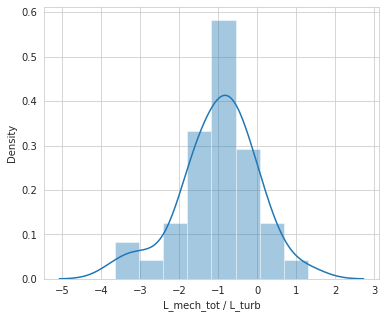

In [49]:
plt.figure(figsize=(6,5))
sns.distplot(np.log10(cloud_energy['power_ratio']),axlabel='L_mech_tot / L_turb')
plt.savefig(filepath + '/output/power_ratio_400.pdf')

In [ ]:
##########################################################################################################################################

In [ ]:
#################################################################################################################################

In [ ]:
################## DO  NOT RUN #####################
from astropy.utils import data
from spectral_cube import SpectralCube
fn = data.get_pkg_data_filename(filepath + '/data/co_spec_cropped.fits', 'spectral_cube')
cube = SpectralCube.read(fn, use_dask=True)
cube
######################################
sys.path.append(filepath + '/data')
from N13mass import mass
mass(cloud, vaxis)
###########################
from dask.diagnostics import ProgressBar
pbar = ProgressBar()
pbar.register()

try:
  ai = np.nanargmax(spec, axis=0)
  vpeak = vaxis[ai]
except ValueError :
  pass
########################
cloud.sigma_clip_spectrally(3)
############################
#cloud > hf[np.newaxis, :, :]

#spec > hf[np.newaxis, :, :]
hf[np.newaxis, :, :].shape
velo, dec, ra = cloud.world[:] 
############################
slice_unmasked = cloud.unmasked_data[:,:,:]  
velo[cloud > hf[np.newaxis, :, :]]

#############################
x = np.arange(10)
np.roll(x, -1)

np.roll(x, -2)
############################
import multiprocessing
import time
#######################
(cloud.filled_data[0,:,:]).shape
cloud.with_fill_value(0.)

NameError: ignored

Goodness of fit for CO vs flat-spectrum protostar number 
 Power_divergenceResult(statistic=149.614314841034, pvalue=7.450536596811895e-22)


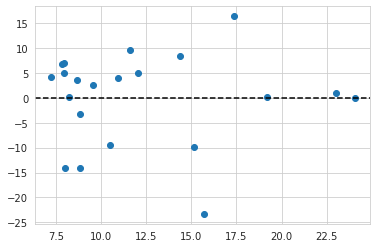

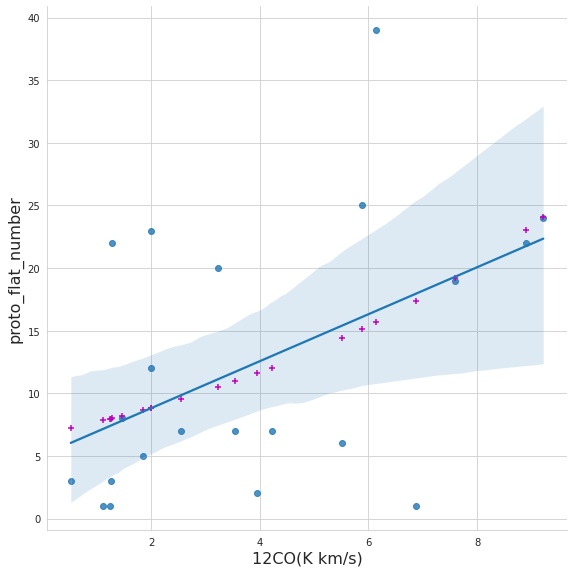

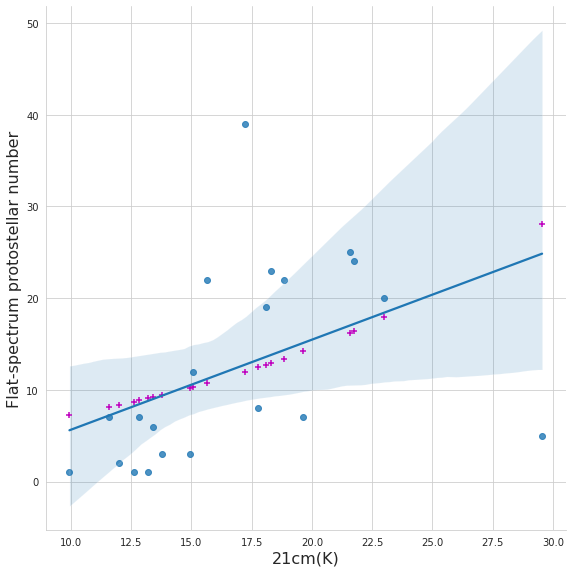

Goodness of fit for CO vs class 1 proto 
 Power_divergenceResult(statistic=134.45711577328115, pvalue=5.656382596604228e-19)


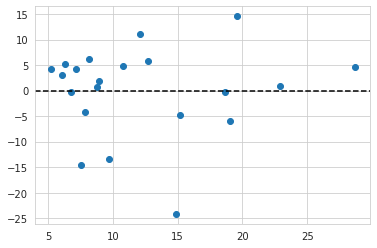

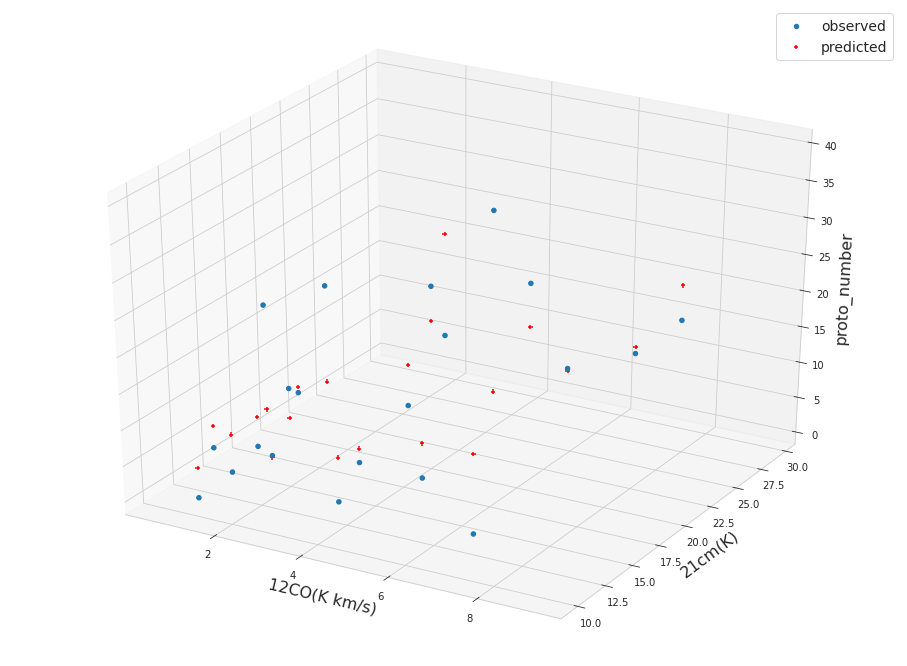

In [ ]:
from sklearn.linear_model import PoissonRegressor
features = ['12CO(K km/s)',	'21cm(K)']
target = ['proto_flat_number']
proto_co = pd.read_csv((filepath + '/data/co+21cm_flat49.csv'))
## >>>>>>>>>>>>>>>>>>>>> 12CO  >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
proto_co_df = proto_co.dropna()
proto_co_df= proto_co_df[proto_co_df['proto_flat_number'] > 0]
proto_co_df= proto_co_df[proto_co_df['proto_flat_number'] < proto_co_df['proto_flat_number'].max()]
X = proto_co_df['12CO(K km/s)']
#X = outflow_df[features]
y = proto_co_df[target]
pr = PoissonRegressor() # instantiating the regressor class 
pr.fit(np.array(X).flatten().reshape(-1,1),  np.array(y).flatten())

y_pred = pr.predict(np.array(X).flatten().reshape(-1,1))
res = y_pred - np.array(y).flatten()
#perform Chi-Square Goodness of Fit Test
print('Goodness of fit for CO vs flat-spectrum protostar number','\n',stats.chisquare(np.array(y).flatten(), y_pred))
plt.scatter(y_pred, res.reshape(-1,1))
plt.axhline(y=0, linestyle='--', color='k')
plt.show()
plt.close()

x = np.linspace(proto_co_df[['12CO(K km/s)']].min(), proto_co_df[['12CO(K km/s)']].max(), 10000)
y_pred_curve = pr.predict(x)
sns.lmplot(data=proto_co_df, x='12CO(K km/s)', y='proto_flat_number', hue=None,height=8, ci=95)

plt.scatter(X,y_pred,color='m',marker='+',label='fitted')
plt.xlabel("12CO(K km/s)", fontsize = 16)
plt.ylabel("proto_flat_number", fontsize = 16)
plt.show()
plt.close()

# >>>>>>>>>>>>>>>>>>>>>>>>> 21cm >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
proto_co_df= proto_co_df[proto_co_df['proto_flat_number'] > 0]
X = proto_co_df['21cm(K)']
#X = outflow_df[features]
y = proto_co_df[target]
pr = PoissonRegressor() # instantiating the regressor class 
pr.fit(np.array(X).flatten().reshape(-1,1),  np.array(y).flatten())
y_pred = pr.predict(np.array(X).flatten().reshape(-1,1))

x = np.linspace(proto_co_df[['21cm(K)']].min(), proto_co_df[['21cm(K)']].max(), 10000)
y_pred_curve = pr.predict(x)
sns.lmplot(data=proto_co_df, x='21cm(K)', y='proto_flat_number', hue=None,height=8, ci=95)

plt.scatter(X,y_pred,color='m',marker='+',label='fitted')
plt.xlabel("21cm(K)", fontsize = 16)
plt.ylabel("Flat-spectrum protostellar number", fontsize = 16)
plt.show()
plt.close()

# >>>>>>>>>>>>>>>>>>>>>   USE both 21cm and 12CO >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
X = proto_co_df[features]
y = proto_co_df[target]
pr = PoissonRegressor() # instantiating the regressor class 

pr.fit(X,  np.array(y).flatten())

y_pred = pr.predict(X)
res = y_pred - np.array(y).flatten()
#perform Chi-Square Goodness of Fit Test
print('Goodness of fit for CO vs class 1 proto','\n',stats.chisquare(np.array(y).flatten(), y_pred))
plt.scatter(y_pred, res.reshape(-1,1))
plt.axhline(y=0, linestyle='--', color='k')
plt.show()
plt.close()

x1 = np.array(proto_co_df[features[0]])
x2 = np.array(proto_co_df[features[1]])

#####################################################################
from matplotlib import cm
X1 = np.array(proto_co_df[features[0]])
X2 = np.array(proto_co_df[features[1]])
y = np.array(proto_co_df[target])

fig = plt.figure(figsize=(16,12))
## We'll add a 3d subplot object
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1, X2, y, cmap=cm.hot, alpha=1, label='observed')
ax.scatter(X1, X2, y_pred, color='r', marker='+',alpha=1, label='predicted')
## Add labels
ax.set_xlabel("12CO(K km/s)", fontsize=16)
ax.set_ylabel("21cm(K)", fontsize=16)
ax.set_zlabel("proto_number", fontsize=16)

plt.legend(fontsize=14)
#plt.savefig(filepath + '/output/co_21cm_of.pdf')
plt.show()
plt.close()
